In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [2]:
warnings.simplefilter("ignore")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.initializers import RandomUniform
import keras.backend as K

In [4]:
#Importing the dataset 
X_dev=pd.read_csv("../data/X_dev.csv")
y_dev=pd.read_csv("../data/y_dev.csv")

In [5]:
def MEE(y_real, y_pred, **kwarg):
    sum_t = 0
    for i in range(len(y_real)):
        sum_t += np.sqrt(np.power((y_real[i][0]-y_pred[i][0]), 2)+np.power((y_real[i][1]-y_pred[i][1]), 2))
    return sum_t / len(y_real)

MEE=make_scorer(MEE, greater_is_better=False)

In [6]:
def MEE_k(y_real, y_pred):
     return K.mean(K.sqrt(K.sum(K.square(y_pred - y_real), axis=-1)))

In [7]:
kf=KFold(n_splits=5, random_state=None, shuffle=True)

In [8]:
def create_model(lr=0.1, mom=0.1, alpha=0.01, unit1=10, unit2=10, act='sigmoid'):
    # create model
    model = Sequential()
    model.add(Dense(unit1, input_dim=10, activation=act, 
                    kernel_regularizer=l2(alpha), 
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(unit2, activation=act, 
                    kernel_regularizer=l2(alpha),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=lr, momentum=mom))
    return model

In [9]:
hyper_params_space = {
        'unit1' : [25, 30, 40, 50, 80],
        'lr' : [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
        'unit2': [5, 15, 25, 35],
        'mom' : [0.01, 0.1, 0.5, 0.7, 0.9],
        'alpha' : [0.1, 1e-5, 1e-8, 1e-10, 1e-20],
        'act' : ['sigmoid', 'softmax']
    },


print('===================================')
model = KerasRegressor(build_fn=create_model, batch_size=1036, epochs=600)
mlpr = GridSearchCV( model
                    , hyper_params_space, scoring='r2', cv=kf, 
                    refit='r2', 
                    n_jobs=2)
mlpr.fit(X_dev, y_dev)
print("DONE")
mlpr.best_estimator_.model.save("Models/test_model2HL.h5")
resultGSCV=pd.DataFrame(mlpr.cv_results_)
#print(pd.DataFrame(mlpr.cv_results_))
resultGSCV.to_csv(r'try2HL.csv')



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/600
1295/1295 [==============================] - 0s 91us/step - loss: 55.8135
Epoch 2/600
1295/1295 [==============================] - 0s 7us/step - loss: 48.1541
Epoch 3/600
1295/1295 [==============================] - 0s 10us/step - loss: 34.0795
Epoch 4/600
1295/1295 [==============================] - 0s 8us/step - loss: 20.1376
Epoch 5/600
1295/1295 [==============================] - 0s 8us/step - loss: 16.2789
Epoch 6/600
1295/1295 [==============================] - 0s 8us/step - loss: 14.7377
Epoch 7/600
1295/1295 [==============================] - 0s 9us/step - loss: 13.3138
Epoch 8/600
1295/1295 [==============================] - 0s 8us/step - loss: 11.0600
Epoch 9/600
1295/1295 [==============================] - 0s 8us/step - loss: 9.0459
Epoch 10/600
1295/1295 [==============================] - 0s 7us/step - loss: 8.6002
Epoch 11/600
1295/1295 [=====

1295/1295 [==============================] - 0s 7us/step - loss: 2.8896
Epoch 186/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6407
Epoch 187/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.7571
Epoch 188/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.7991
Epoch 189/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.8250
Epoch 190/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6758
Epoch 191/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6143
Epoch 192/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.5877
Epoch 193/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6397
Epoch 194/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6915
Epoch 195/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6082
Epoch 196/600
1295/1295 [==============================] - 0s 6us/st

1295/1295 [==============================] - 0s 7us/step - loss: 2.5978
Epoch 374/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4739
Epoch 375/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4584
Epoch 376/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5779
Epoch 377/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6157
Epoch 378/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5720
Epoch 379/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4253
Epoch 380/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.4548
Epoch 381/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.4634
Epoch 382/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.4371
Epoch 383/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5702
Epoch 384/600
1295/1295 [==============================] - 0s 5us/st

1295/1295 [==============================] - 0s 6us/step - loss: 2.4186
Epoch 563/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.4617
Epoch 564/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.4656
Epoch 565/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.4323
Epoch 566/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.3929
Epoch 567/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4506
Epoch 568/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4555
Epoch 569/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5004
Epoch 570/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.3207
Epoch 571/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.3320
Epoch 572/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5536
Epoch 573/600
1295/1295 [==============================] - 0s 7us/st

In [10]:
mlpr.best_params_

{'act': 'sigmoid',
 'alpha': 1e-05,
 'lr': 0.3,
 'mom': 0.5,
 'unit1': 50,
 'unit2': 25}

In [11]:
mlpr.best_score_

0.949160150566584

In [12]:
X_dev=X_dev.to_numpy()
y_dev=y_dev.to_numpy()

In [13]:
def create_modelLC():
    # create model
    model = Sequential()
    model.add(Dense(mlpr.best_params_['unit1'], input_dim=10, activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(mlpr.best_params_['unit2'], activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=mlpr.best_params_['lr'], 
                                                            momentum=mlpr.best_params_['mom']))
    return model

In [14]:
historyVal = []
historyTr = []

mc = ModelCheckpoint('best_modelLC2HL.h5', monitor='val_loss', save_best_only=True)

for traing_index, test_index in kf.split(X_dev):
    x_tr = X_dev[traing_index]
    y_tr = y_dev[traing_index]
    x_val = X_dev[test_index]
    y_val = y_dev[test_index]
    model=create_modelLC()
    #model.add_loss(MEE_k)
    history=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=600, 
                      batch_size=1036).history
    historyVal.append(history['val_loss'])
    historyTr.append(history['loss'])
model=create_modelLC()
#model.add_loss(MEE_k)
model.fit(X_dev, y_dev, epochs=600, 
                      batch_size=1036, callbacks=[mc]).history

Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 0s 141us/step - loss: 56.6659 - val_loss: 53.9298
Epoch 2/600
1036/1036 [==============================] - 0s 6us/step - loss: 53.8348 - val_loss: 49.3813
Epoch 3/600
1036/1036 [==============================] - 0s 7us/step - loss: 49.2688 - val_loss: 43.2751
Epoch 4/600
1036/1036 [==============================] - 0s 6us/step - loss: 43.1380 - val_loss: 35.7936
Epoch 5/600
1036/1036 [==============================] - 0s 6us/step - loss: 35.6133 - val_loss: 27.8206
Epoch 6/600
1036/1036 [==============================] - 0s 6us/step - loss: 27.4906 - val_loss: 21.6895
Epoch 7/600
1036/1036 [==============================] - 0s 7us/step - loss: 21.1031 - val_loss: 18.6911
Epoch 8/600
1036/1036 [==============================] - 0s 7us/step - loss: 18.0720 - val_loss: 17.2001
Epoch 9/600
1036/1036 [==============================] - 0s 6us/step - loss: 16.5651 - val_loss: 16.4146
Epoch 

1036/1036 [==============================] - 0s 5us/step - loss: 3.3445 - val_loss: 3.5111
Epoch 80/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.3340 - val_loss: 3.4230
Epoch 81/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.3221 - val_loss: 3.4791
Epoch 82/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.3057 - val_loss: 3.3901
Epoch 83/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.2959 - val_loss: 3.4491
Epoch 84/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.2803 - val_loss: 3.3599
Epoch 85/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.2713 - val_loss: 3.4236
Epoch 86/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.2591 - val_loss: 3.3345
Epoch 87/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.2506 - val_loss: 3.4019
Epoch 88/600
1036/1036 [==============================] - 0s 7us/step - loss:

Epoch 158/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8730 - val_loss: 2.9735
Epoch 159/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8658 - val_loss: 3.0160
Epoch 160/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8694 - val_loss: 2.9701
Epoch 161/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8616 - val_loss: 3.0130
Epoch 162/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8653 - val_loss: 2.9670
Epoch 163/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8581 - val_loss: 3.0108
Epoch 164/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8622 - val_loss: 2.9646
Epoch 165/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8554 - val_loss: 3.0092
Epoch 166/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8596 - val_loss: 2.9619
Epoch 167/600
1036/1036 [==============================

Epoch 314/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6605 - val_loss: 2.8260
Epoch 315/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6522 - val_loss: 2.8906
Epoch 316/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6570 - val_loss: 2.8251
Epoch 317/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6507 - val_loss: 2.8917
Epoch 318/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6568 - val_loss: 2.8256
Epoch 319/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6510 - val_loss: 2.8939
Epoch 320/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6575 - val_loss: 2.8263
Epoch 321/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6516 - val_loss: 2.8955
Epoch 322/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6577 - val_loss: 2.8267
Epoch 323/600
1036/1036 [=============================

Epoch 392/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6117 - val_loss: 2.8183
Epoch 393/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6148 - val_loss: 2.8975
Epoch 394/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6244 - val_loss: 2.8263
Epoch 395/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6246 - val_loss: 2.9121
Epoch 396/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6367 - val_loss: 2.8342
Epoch 397/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6347 - val_loss: 2.9217
Epoch 398/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6442 - val_loss: 2.8376
Epoch 399/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6385 - val_loss: 2.9216
Epoch 400/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6425 - val_loss: 2.8335
Epoch 401/600
1036/1036 [=============================

Epoch 470/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5342 - val_loss: 2.7842
Epoch 471/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5379 - val_loss: 2.8426
Epoch 472/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5436 - val_loss: 2.7906
Epoch 473/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5454 - val_loss: 2.8481
Epoch 474/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.5477 - val_loss: 2.7931
Epoch 475/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5477 - val_loss: 2.8523
Epoch 476/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5502 - val_loss: 2.7960
Epoch 477/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5506 - val_loss: 2.8566
Epoch 478/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5532 - val_loss: 2.7987
Epoch 479/600
1036/1036 [=============================

1036/1036 [==============================] - 0s 6us/step - loss: 2.5441 - val_loss: 2.8019
Epoch 549/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5381 - val_loss: 2.8586
Epoch 550/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5380 - val_loss: 2.8029
Epoch 551/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5389 - val_loss: 2.8563
Epoch 552/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5374 - val_loss: 2.8028
Epoch 553/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5374 - val_loss: 2.8524
Epoch 554/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5348 - val_loss: 2.8020
Epoch 555/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5336 - val_loss: 2.8504
Epoch 556/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5325 - val_loss: 2.8018
Epoch 557/600
1036/1036 [==============================] - 0s 7us/ste

Epoch 26/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.9487 - val_loss: 8.2256
Epoch 27/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.8165 - val_loss: 8.0813
Epoch 28/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.6884 - val_loss: 7.9385
Epoch 29/600
1036/1036 [==============================] - 0s 5us/step - loss: 7.5588 - val_loss: 7.7944
Epoch 30/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.4256 - val_loss: 7.6496
Epoch 31/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.2898 - val_loss: 7.5056
Epoch 32/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.1534 - val_loss: 7.3638
Epoch 33/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.0177 - val_loss: 7.2246
Epoch 34/600
1036/1036 [==============================] - 0s 8us/step - loss: 6.8836 - val_loss: 7.0871
Epoch 35/600
1036/1036 [==============================] - 0s 7us

Epoch 105/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0609 - val_loss: 3.1455
Epoch 106/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0571 - val_loss: 3.0672
Epoch 107/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0502 - val_loss: 3.1344
Epoch 108/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0443 - val_loss: 3.0546
Epoch 109/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.0356 - val_loss: 3.1236
Epoch 110/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.0303 - val_loss: 3.0448
Epoch 111/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.0216 - val_loss: 3.1128
Epoch 112/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0183 - val_loss: 3.0369
Epoch 113/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0114 - val_loss: 3.1077
Epoch 114/600
1036/1036 [==============================

Epoch 183/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.8216 - val_loss: 2.9458
Epoch 184/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8207 - val_loss: 2.8572
Epoch 185/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8158 - val_loss: 2.9405
Epoch 186/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8142 - val_loss: 2.8513
Epoch 187/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8085 - val_loss: 2.9338
Epoch 188/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8063 - val_loss: 2.8459
Epoch 189/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8014 - val_loss: 2.9248
Epoch 190/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7970 - val_loss: 2.8412
Epoch 191/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7933 - val_loss: 2.9205
Epoch 192/600
1036/1036 [=============================

Epoch 261/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.7003 - val_loss: 2.8361
Epoch 262/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6959 - val_loss: 2.7523
Epoch 263/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6903 - val_loss: 2.8252
Epoch 264/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6859 - val_loss: 2.7477
Epoch 265/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6835 - val_loss: 2.8227
Epoch 266/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6823 - val_loss: 2.7460
Epoch 267/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6826 - val_loss: 2.8234
Epoch 268/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6810 - val_loss: 2.7435
Epoch 269/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6810 - val_loss: 2.8212
Epoch 270/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 7us/step - loss: 2.6330 - val_loss: 2.7977
Epoch 340/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6320 - val_loss: 2.7117
Epoch 341/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6267 - val_loss: 2.7935
Epoch 342/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6269 - val_loss: 2.7083
Epoch 343/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6219 - val_loss: 2.7906
Epoch 344/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6226 - val_loss: 2.7038
Epoch 345/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6171 - val_loss: 2.7852
Epoch 346/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6171 - val_loss: 2.6993
Epoch 347/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6121 - val_loss: 2.7805
Epoch 348/600
1036/1036 [==============================] - 0s 7us/ste

Epoch 418/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5881 - val_loss: 2.6889
Epoch 419/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5879 - val_loss: 2.7791
Epoch 420/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5922 - val_loss: 2.6922
Epoch 421/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5912 - val_loss: 2.7808
Epoch 422/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5944 - val_loss: 2.6935
Epoch 423/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5919 - val_loss: 2.7807
Epoch 424/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5944 - val_loss: 2.6939
Epoch 425/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5914 - val_loss: 2.7804
Epoch 426/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.5937 - val_loss: 2.6935
Epoch 427/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 10us/step - loss: 2.5575 - val_loss: 2.6714
Epoch 497/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5549 - val_loss: 2.7721
Epoch 498/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5575 - val_loss: 2.6754
Epoch 499/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5572 - val_loss: 2.7757
Epoch 500/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5615 - val_loss: 2.6793
Epoch 501/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5602 - val_loss: 2.7777
Epoch 502/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5646 - val_loss: 2.6844
Epoch 503/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5643 - val_loss: 2.7847
Epoch 504/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5735 - val_loss: 2.6900
Epoch 505/600
1036/1036 [==============================] - 0s 5us/st

Epoch 575/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5480 - val_loss: 2.7888
Epoch 576/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5531 - val_loss: 2.6858
Epoch 577/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5467 - val_loss: 2.7864
Epoch 578/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5489 - val_loss: 2.6813
Epoch 579/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5423 - val_loss: 2.7837
Epoch 580/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5432 - val_loss: 2.6769
Epoch 581/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5380 - val_loss: 2.7816
Epoch 582/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5386 - val_loss: 2.6733
Epoch 583/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5345 - val_loss: 2.7806
Epoch 584/600
1036/1036 [==============================

Epoch 53/600
1036/1036 [==============================] - 0s 6us/step - loss: 4.2535 - val_loss: 3.9052
Epoch 54/600
1036/1036 [==============================] - 0s 9us/step - loss: 4.2748 - val_loss: 4.0317
Epoch 55/600
1036/1036 [==============================] - 0s 5us/step - loss: 4.2414 - val_loss: 3.8511
Epoch 56/600
1036/1036 [==============================] - 0s 7us/step - loss: 4.2132 - val_loss: 3.9440
Epoch 57/600
1036/1036 [==============================] - 0s 8us/step - loss: 4.1184 - val_loss: 3.7303
Epoch 58/600
1036/1036 [==============================] - 0s 7us/step - loss: 4.0603 - val_loss: 3.8427
Epoch 59/600
1036/1036 [==============================] - 0s 4us/step - loss: 3.9889 - val_loss: 3.6381
Epoch 60/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.9408 - val_loss: 3.7700
Epoch 61/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.8948 - val_loss: 3.5724
Epoch 62/600
1036/1036 [==============================] - 0s 8us

Epoch 132/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.0093 - val_loss: 3.1461
Epoch 133/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0024 - val_loss: 3.0364
Epoch 134/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.9988 - val_loss: 3.1359
Epoch 135/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.9907 - val_loss: 3.0279
Epoch 136/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.9859 - val_loss: 3.1253
Epoch 137/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9787 - val_loss: 3.0201
Epoch 138/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.9742 - val_loss: 3.1183
Epoch 139/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.9695 - val_loss: 3.0145
Epoch 140/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.9668 - val_loss: 3.1157
Epoch 141/600
1036/1036 [==============================

Epoch 210/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8134 - val_loss: 2.9834
Epoch 211/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8079 - val_loss: 2.8870
Epoch 212/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8020 - val_loss: 2.9761
Epoch 213/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8003 - val_loss: 2.8838
Epoch 214/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.7986 - val_loss: 2.9766
Epoch 215/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8000 - val_loss: 2.8854
Epoch 216/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8013 - val_loss: 2.9834
Epoch 217/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8056 - val_loss: 2.8903
Epoch 218/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8090 - val_loss: 2.9956
Epoch 219/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 6us/step - loss: 2.7253 - val_loss: 2.9400
Epoch 289/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7331 - val_loss: 2.8529
Epoch 290/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7273 - val_loss: 2.9414
Epoch 291/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7334 - val_loss: 2.8523
Epoch 292/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7255 - val_loss: 2.9369
Epoch 293/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7281 - val_loss: 2.8480
Epoch 294/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7185 - val_loss: 2.9276
Epoch 295/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7178 - val_loss: 2.8417
Epoch 296/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7084 - val_loss: 2.9212
Epoch 297/600
1036/1036 [==============================] - 0s 8us/st

1036/1036 [==============================] - 0s 9us/step - loss: 2.6497 - val_loss: 2.9164
Epoch 367/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6553 - val_loss: 2.8250
Epoch 368/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6470 - val_loss: 2.9151
Epoch 369/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6525 - val_loss: 2.8243
Epoch 370/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6445 - val_loss: 2.9145
Epoch 371/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6505 - val_loss: 2.8241
Epoch 372/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6430 - val_loss: 2.9147
Epoch 373/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6493 - val_loss: 2.8242
Epoch 374/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.6418 - val_loss: 2.9151
Epoch 375/600
1036/1036 [==============================] - 0s 5us/ste

1036/1036 [==============================] - 0s 5us/step - loss: 2.5903 - val_loss: 2.9065
Epoch 445/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.5951 - val_loss: 2.8205
Epoch 446/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5905 - val_loss: 2.9122
Epoch 447/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5983 - val_loss: 2.8220
Epoch 448/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5931 - val_loss: 2.9207
Epoch 449/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6040 - val_loss: 2.8221
Epoch 450/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5954 - val_loss: 2.9290
Epoch 451/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6076 - val_loss: 2.8213
Epoch 452/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5961 - val_loss: 2.9337
Epoch 453/600
1036/1036 [==============================] - 0s 5us/ste

Epoch 523/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5733 - val_loss: 2.8172
Epoch 524/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5620 - val_loss: 2.9575
Epoch 525/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5870 - val_loss: 2.8206
Epoch 526/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5694 - val_loss: 2.9599
Epoch 527/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5866 - val_loss: 2.8181
Epoch 528/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5634 - val_loss: 2.9539
Epoch 529/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5803 - val_loss: 2.8278
Epoch 530/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5660 - val_loss: 2.9674
Epoch 531/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5932 - val_loss: 2.8503
Epoch 532/600
1036/1036 [==============================

Epoch 2/600
1036/1036 [==============================] - 0s 7us/step - loss: 54.4097 - val_loss: 50.4971
Epoch 3/600
1036/1036 [==============================] - 0s 7us/step - loss: 50.2723 - val_loss: 45.1621
Epoch 4/600
1036/1036 [==============================] - 0s 5us/step - loss: 44.9420 - val_loss: 38.3905
Epoch 5/600
1036/1036 [==============================] - 0s 5us/step - loss: 38.1726 - val_loss: 30.4107
Epoch 6/600
1036/1036 [==============================] - 0s 6us/step - loss: 30.2034 - val_loss: 22.9530
Epoch 7/600
1036/1036 [==============================] - 0s 7us/step - loss: 22.9188 - val_loss: 18.9102
Epoch 8/600
1036/1036 [==============================] - 0s 6us/step - loss: 19.0052 - val_loss: 17.1117
Epoch 9/600
1036/1036 [==============================] - 0s 6us/step - loss: 17.1829 - val_loss: 16.2574
Epoch 10/600
1036/1036 [==============================] - 0s 6us/step - loss: 16.3655 - val_loss: 15.7759
Epoch 11/600
1036/1036 [==============================

Epoch 81/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.4563 - val_loss: 3.6451
Epoch 82/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.4397 - val_loss: 3.4831
Epoch 83/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.3846 - val_loss: 3.5719
Epoch 84/600
1036/1036 [==============================] - 0s 4us/step - loss: 3.3699 - val_loss: 3.4241
Epoch 85/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.3227 - val_loss: 3.5152
Epoch 86/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.3165 - val_loss: 3.3915
Epoch 87/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.2912 - val_loss: 3.4946
Epoch 88/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.2970 - val_loss: 3.3798
Epoch 89/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.2856 - val_loss: 3.4939
Epoch 90/600
1036/1036 [==============================] - 0s 5us

Epoch 160/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7555 - val_loss: 2.9965
Epoch 161/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7526 - val_loss: 3.0027
Epoch 162/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7500 - val_loss: 2.9935
Epoch 163/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7474 - val_loss: 3.0041
Epoch 164/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.7453 - val_loss: 2.9877
Epoch 165/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.7434 - val_loss: 3.0072
Epoch 166/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.7422 - val_loss: 2.9825
Epoch 167/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7411 - val_loss: 3.0142
Epoch 168/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.7413 - val_loss: 2.9812
Epoch 169/600
1036/1036 [==============================

Epoch 238/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6311 - val_loss: 2.9332
Epoch 239/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6334 - val_loss: 2.9878
Epoch 240/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6349 - val_loss: 2.9357
Epoch 241/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6380 - val_loss: 2.9971
Epoch 242/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6401 - val_loss: 2.9381
Epoch 243/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6438 - val_loss: 3.0086
Epoch 244/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6456 - val_loss: 2.9386
Epoch 245/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6506 - val_loss: 3.0223
Epoch 246/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6522 - val_loss: 2.9407
Epoch 247/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 11us/step - loss: 2.6089 - val_loss: 2.9345
Epoch 317/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.6091 - val_loss: 3.0051
Epoch 318/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6073 - val_loss: 2.9339
Epoch 319/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6074 - val_loss: 3.0039
Epoch 320/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6056 - val_loss: 2.9334
Epoch 321/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6057 - val_loss: 3.0025
Epoch 322/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6039 - val_loss: 2.9329
Epoch 323/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6037 - val_loss: 3.0006
Epoch 324/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6017 - val_loss: 2.9321
Epoch 325/600
1036/1036 [==============================] - 0s 6us/st

Epoch 395/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5557 - val_loss: 2.9790
Epoch 396/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5541 - val_loss: 2.9172
Epoch 397/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5546 - val_loss: 2.9785
Epoch 398/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5529 - val_loss: 2.9170
Epoch 399/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5535 - val_loss: 2.9780
Epoch 400/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5517 - val_loss: 2.9168
Epoch 401/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5524 - val_loss: 2.9776
Epoch 402/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5506 - val_loss: 2.9167
Epoch 403/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5514 - val_loss: 2.9773
Epoch 404/600
1036/1036 [==============================

Epoch 473/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5196 - val_loss: 2.9469
Epoch 474/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5106 - val_loss: 2.9248
Epoch 475/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5095 - val_loss: 2.9369
Epoch 476/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.4996 - val_loss: 2.9155
Epoch 477/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.4956 - val_loss: 2.9266
Epoch 478/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.4883 - val_loss: 2.9122
Epoch 479/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.4878 - val_loss: 2.9229
Epoch 480/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.4846 - val_loss: 2.9143
Epoch 481/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.4872 - val_loss: 2.9243
Epoch 482/600
1036/1036 [=============================

1036/1036 [==============================] - 0s 4us/step - loss: 2.5095 - val_loss: 2.9632
Epoch 552/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.4964 - val_loss: 2.9322
Epoch 553/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.5124 - val_loss: 2.9668
Epoch 554/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.4976 - val_loss: 2.9296
Epoch 555/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5118 - val_loss: 2.9666
Epoch 556/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.4957 - val_loss: 2.9265
Epoch 557/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5087 - val_loss: 2.9639
Epoch 558/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.4921 - val_loss: 2.9239
Epoch 559/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5050 - val_loss: 2.9605
Epoch 560/600
1036/1036 [==============================] - 0s 5us/ste

Epoch 29/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.8395 - val_loss: 8.0942
Epoch 30/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.7209 - val_loss: 7.9715
Epoch 31/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.5963 - val_loss: 7.8420
Epoch 32/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.4663 - val_loss: 7.7076
Epoch 33/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.3315 - val_loss: 7.5657
Epoch 34/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.1918 - val_loss: 7.4187
Epoch 35/600
1036/1036 [==============================] - 0s 9us/step - loss: 7.0470 - val_loss: 7.2666
Epoch 36/600
1036/1036 [==============================] - 0s 7us/step - loss: 6.8971 - val_loss: 7.1068
Epoch 37/600
1036/1036 [==============================] - 0s 7us/step - loss: 6.7420 - val_loss: 6.9398
Epoch 38/600
1036/1036 [==============================] - 0s 8us

Epoch 108/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0368 - val_loss: 3.3732
Epoch 109/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0239 - val_loss: 3.1749
Epoch 110/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0153 - val_loss: 3.3510
Epoch 111/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0050 - val_loss: 3.1649
Epoch 112/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0016 - val_loss: 3.3415
Epoch 113/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9957 - val_loss: 3.1581
Epoch 114/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.9963 - val_loss: 3.3412
Epoch 115/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.9922 - val_loss: 3.1531
Epoch 116/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9942 - val_loss: 3.3404
Epoch 117/600
1036/1036 [==============================

Epoch 264/600
1036/1036 [==============================] - 0s 16us/step - loss: 2.6659 - val_loss: 3.0773
Epoch 265/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6643 - val_loss: 2.9062
Epoch 266/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6681 - val_loss: 3.0817
Epoch 267/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6657 - val_loss: 2.9061
Epoch 268/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6688 - val_loss: 3.0842
Epoch 269/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6659 - val_loss: 2.9057
Epoch 270/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6687 - val_loss: 3.0865
Epoch 271/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6661 - val_loss: 2.9055
Epoch 272/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6691 - val_loss: 3.0910
Epoch 273/600
1036/1036 [=============================

Epoch 342/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5628 - val_loss: 2.9665
Epoch 343/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5641 - val_loss: 2.9072
Epoch 344/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5622 - val_loss: 2.9684
Epoch 345/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5637 - val_loss: 2.9059
Epoch 346/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5618 - val_loss: 2.9716
Epoch 347/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5637 - val_loss: 2.9039
Epoch 348/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5622 - val_loss: 2.9788
Epoch 349/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5652 - val_loss: 2.9010
Epoch 350/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5650 - val_loss: 2.9959
Epoch 351/600
1036/1036 [=============================

Epoch 421/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5743 - val_loss: 2.8838
Epoch 422/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5778 - val_loss: 3.0582
Epoch 423/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.5732 - val_loss: 2.8836
Epoch 424/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5767 - val_loss: 3.0579
Epoch 425/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.5721 - val_loss: 2.8834
Epoch 426/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5756 - val_loss: 3.0576
Epoch 427/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5711 - val_loss: 2.8832
Epoch 428/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5745 - val_loss: 3.0573
Epoch 429/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5700 - val_loss: 2.8830
Epoch 430/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 5us/step - loss: 2.5785 - val_loss: 2.8961
Epoch 500/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5797 - val_loss: 3.0913
Epoch 501/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5713 - val_loss: 2.8919
Epoch 502/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5704 - val_loss: 3.0817
Epoch 503/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5627 - val_loss: 2.8865
Epoch 504/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5574 - val_loss: 3.0668
Epoch 505/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5499 - val_loss: 2.8812
Epoch 506/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5416 - val_loss: 3.0444
Epoch 507/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5333 - val_loss: 2.8756
Epoch 508/600
1036/1036 [==============================] - 0s 7us/ste

1036/1036 [==============================] - 0s 8us/step - loss: 2.5151 - val_loss: 2.8802
Epoch 578/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5127 - val_loss: 3.0535
Epoch 579/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5130 - val_loss: 2.8804
Epoch 580/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5109 - val_loss: 3.0523
Epoch 581/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5115 - val_loss: 2.8806
Epoch 582/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5098 - val_loss: 3.0512
Epoch 583/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5105 - val_loss: 2.8807
Epoch 584/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5084 - val_loss: 3.0503
Epoch 585/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5093 - val_loss: 2.8810
Epoch 586/600
1036/1036 [==============================] - 0s 7us/st

1295/1295 [==============================] - 0s 7us/step - loss: 2.5992
Epoch 163/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.7597
Epoch 164/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.8276
Epoch 165/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6747
Epoch 166/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.7893
Epoch 167/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.6727
Epoch 168/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.7659
Epoch 169/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6953
Epoch 170/600
1295/1295 [==============================] - 0s 7us/step - loss: 3.0911
Epoch 171/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5842
Epoch 172/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6280
Epoch 173/600
1295/1295 [==============================] - 0s 8us/st

1295/1295 [==============================] - 0s 7us/step - loss: 2.6634
Epoch 352/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5107
Epoch 353/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4118
Epoch 354/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4164
Epoch 355/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6146
Epoch 356/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5208
Epoch 357/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4663
Epoch 358/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.4286
Epoch 359/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4145
Epoch 360/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.5036
Epoch 361/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5811
Epoch 362/600
1295/1295 [==============================] - 0s 6us/st

Epoch 541/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.3014
Epoch 542/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.3067
Epoch 543/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.3379
Epoch 544/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4117
Epoch 545/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4278
Epoch 546/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.3262
Epoch 547/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.3265
Epoch 548/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4167
Epoch 549/600
1295/1295 [==============================] - 0s 13us/step - loss: 2.3497
Epoch 550/600
1295/1295 [==============================] - 0s 13us/step - loss: 2.3513
Epoch 551/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.3727
Epoch 552/600
1295/1295 [===========================

{'loss': [56.111654663085936,
  48.57334671020508,
  35.34547080993652,
  21.131558990478517,
  16.4138916015625,
  14.619064712524414,
  12.482343101501465,
  10.182450675964356,
  8.901171493530274,
  8.608712577819825,
  8.380832099914551,
  8.086119842529296,
  7.755750465393066,
  7.435436630249024,
  7.0826640129089355,
  6.738948631286621,
  6.398367500305175,
  6.111771297454834,
  5.73723030090332,
  5.39978666305542,
  5.074420166015625,
  4.7920557975769045,
  4.492268466949463,
  4.274750137329102,
  4.105009365081787,
  3.9558905124664308,
  3.9873655796051026,
  3.848421907424927,
  3.746362495422363,
  3.61915979385376,
  3.8037203788757323,
  3.6042335987091065,
  3.602437162399292,
  3.50720796585083,
  3.5787992000579836,
  3.4266061305999758,
  3.3483601570129395,
  3.26975679397583,
  3.2387835025787353,
  3.3116362571716307,
  3.7294626235961914,
  3.258966493606567,
  3.188412618637085,
  3.3173696041107177,
  3.1977760791778564,
  3.3152568340301514,
  3.18767533

In [15]:
historyVal_mean=np.mean(historyVal, axis=0)
historyTr_mean=np.mean(historyTr, axis=0)

historyVal_sd=np.std(historyVal, axis=0)
historyTr_sd=np.std(historyTr, axis=0)

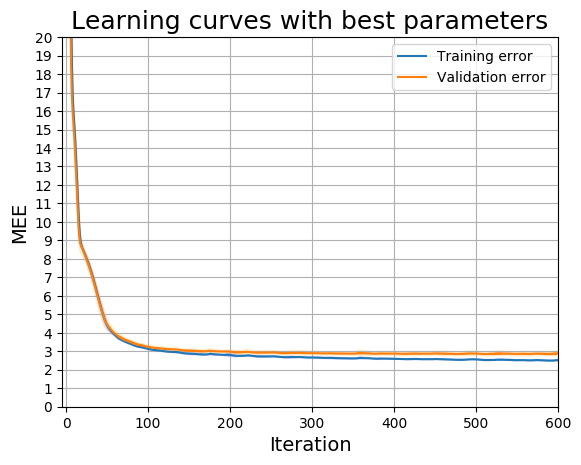

In [46]:
plt.style.use('default')

plt.plot(range(len(historyTr_mean)),historyTr_mean, label = 'Training error')
plt.fill_between(range(len(historyTr_mean)), historyTr_mean - historyTr_sd, historyTr_mean + historyTr_sd, 
                 color='b', alpha=0.15)

plt.plot(range(len(historyVal_mean)), historyVal_mean, label = 'Validation error')
plt.fill_between(range(len(historyVal_mean)), historyVal_mean - historyVal_sd, 
                 historyVal_mean + historyVal_sd, 
                 color='orange', alpha=0.15)

plt.ylabel('MEE', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning curves with best parameters', fontsize = 18)
plt.legend()
plt.ylim(5,20)
plt.xlim(-5,600)
plt.yticks(np.arange(0, 21, +1))

plt.grid()

In [127]:
print("Best model result:")
print("MEE on the validation",historyVal_mean[-1],"with standard deviation",historyVal_sd[-1])
print("MEE on the training",historyTr_mean[-1],"with standard deviation",historyTr_sd[-1])

Best model result:
MEE on the validation 2.8851062297821044 with standard deviation 0.14524664445320093
MEE on the training 2.5144044876098635 with standard deviation 0.03642023272310837


In [26]:
def create_model_NoReg():
    # create model
    model = Sequential()
    model.add(Dense(mlpr.best_params_['unit1'], input_dim=10, activation=mlpr.best_params_['act'], 
                    ))
    model.add(Dense(mlpr.best_params_['unit2'], activation=mlpr.best_params_['act'], 
                    ))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=mlpr.best_params_['lr'], 
                                                            momentum=mlpr.best_params_['mom']))
    return model

In [27]:
historyVal_NoReg = []
historyTr_NoReg = []

#mc = ModelCheckpoint('best_modelLC2HL.h5', monitor='val_loss', save_best_only=True)

for traing_index, test_index in kf.split(X_dev):
    x_tr = X_dev[traing_index]
    y_tr = y_dev[traing_index]
    x_val = X_dev[test_index]
    y_val = y_dev[test_index]
    model=create_model_NoReg()
    #model.add_loss(MEE_k)
    history=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=600, 
                      batch_size=1036).history
    historyVal_NoReg.append(history['val_loss'])
    historyTr_NoReg.append(history['loss'])
model=create_model_NoReg()
#model.add_loss(MEE_k)
model.fit(X_dev, y_dev, epochs=600, 
                      batch_size=1036).history

Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 0s 325us/step - loss: 56.4381 - val_loss: 54.2541
Epoch 2/600
1036/1036 [==============================] - 0s 6us/step - loss: 54.0474 - val_loss: 50.3602
Epoch 3/600
1036/1036 [==============================] - 0s 6us/step - loss: 50.1549 - val_loss: 44.6226
Epoch 4/600
1036/1036 [==============================] - 0s 10us/step - loss: 44.4228 - val_loss: 36.5713
Epoch 5/600
1036/1036 [==============================] - 0s 8us/step - loss: 36.3975 - val_loss: 27.2096
Epoch 6/600
1036/1036 [==============================] - 0s 14us/step - loss: 27.1435 - val_loss: 20.3356
Epoch 7/600
1036/1036 [==============================] - 0s 17us/step - loss: 20.3264 - val_loss: 17.5408
Epoch 8/600
1036/1036 [==============================] - 0s 12us/step - loss: 17.6071 - val_loss: 16.5672
Epoch 9/600
1036/1036 [==============================] - 0s 16us/step - loss: 16.6555 - val_loss: 16.3364
E

Epoch 79/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.9668 - val_loss: 4.1076
Epoch 80/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.9448 - val_loss: 4.2290
Epoch 81/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.9950 - val_loss: 4.1316
Epoch 82/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.9813 - val_loss: 4.2448
Epoch 83/600
1036/1036 [==============================] - 0s 8us/step - loss: 4.0215 - val_loss: 4.1014
Epoch 84/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.9410 - val_loss: 4.1363
Epoch 85/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.9171 - val_loss: 3.9970
Epoch 86/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.8241 - val_loss: 4.0468
Epoch 87/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.8324 - val_loss: 3.9619
Epoch 88/600
1036/1036 [==============================] - 0s 6u

1036/1036 [==============================] - 0s 8us/step - loss: 3.0697 - val_loss: 3.3799
Epoch 158/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0809 - val_loss: 3.2717
Epoch 159/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0648 - val_loss: 3.3749
Epoch 160/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0756 - val_loss: 3.2664
Epoch 161/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.0597 - val_loss: 3.3693
Epoch 162/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0695 - val_loss: 3.2605
Epoch 163/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0533 - val_loss: 3.3631
Epoch 164/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0625 - val_loss: 3.2546
Epoch 165/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0470 - val_loss: 3.3577
Epoch 166/600
1036/1036 [==============================] - 0s 8us/s

Epoch 235/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8670 - val_loss: 3.1769
Epoch 236/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8734 - val_loss: 3.0877
Epoch 237/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8659 - val_loss: 3.1752
Epoch 238/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8727 - val_loss: 3.0853
Epoch 239/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8649 - val_loss: 3.1731
Epoch 240/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8714 - val_loss: 3.0827
Epoch 241/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8631 - val_loss: 3.1703
Epoch 242/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8692 - val_loss: 3.0798
Epoch 243/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8606 - val_loss: 3.1670
Epoch 244/600
1036/1036 [==============================

Epoch 313/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.7515 - val_loss: 3.0085
Epoch 314/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7486 - val_loss: 3.0246
Epoch 315/600
1036/1036 [==============================] - 0s 14us/step - loss: 2.7292 - val_loss: 2.9963
Epoch 316/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7260 - val_loss: 3.0043
Epoch 317/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7047 - val_loss: 2.9926
Epoch 318/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7080 - val_loss: 2.9932
Epoch 319/600
1036/1036 [==============================] - 0s 15us/step - loss: 2.6962 - val_loss: 3.0038
Epoch 320/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.7093 - val_loss: 2.9941
Epoch 321/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.7049 - val_loss: 3.0184
Epoch 322/600
1036/1036 [=======================

Epoch 391/600
1036/1036 [==============================] - 0s 15us/step - loss: 2.7113 - val_loss: 3.0245
Epoch 392/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.7201 - val_loss: 2.9523
Epoch 393/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.7124 - val_loss: 3.0263
Epoch 394/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.7225 - val_loss: 2.9529
Epoch 395/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7150 - val_loss: 3.0273
Epoch 396/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7240 - val_loss: 2.9534
Epoch 397/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7167 - val_loss: 3.0254
Epoch 398/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7223 - val_loss: 2.9520
Epoch 399/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.7154 - val_loss: 3.0241
Epoch 400/600
1036/1036 [========================

Epoch 469/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7210 - val_loss: 2.9562
Epoch 470/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7162 - val_loss: 3.0517
Epoch 471/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.7420 - val_loss: 2.9730
Epoch 472/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7440 - val_loss: 3.0742
Epoch 473/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7716 - val_loss: 2.9910
Epoch 474/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7678 - val_loss: 3.0703
Epoch 475/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7682 - val_loss: 2.9794
Epoch 476/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7487 - val_loss: 3.0413
Epoch 477/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7317 - val_loss: 2.9526
Epoch 478/600
1036/1036 [============================

Epoch 547/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5945 - val_loss: 2.9061
Epoch 548/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5912 - val_loss: 2.9384
Epoch 549/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6034 - val_loss: 2.9122
Epoch 550/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6007 - val_loss: 2.9424
Epoch 551/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.6078 - val_loss: 2.9087
Epoch 552/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5982 - val_loss: 2.9395
Epoch 553/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6027 - val_loss: 2.9064
Epoch 554/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.5968 - val_loss: 2.9421
Epoch 555/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6043 - val_loss: 2.9071
Epoch 556/600
1036/1036 [===========================

Epoch 25/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.6921 - val_loss: 7.9745
Epoch 26/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.6588 - val_loss: 7.9328
Epoch 27/600
1036/1036 [==============================] - 0s 12us/step - loss: 8.6302 - val_loss: 7.8946
Epoch 28/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.6026 - val_loss: 7.8592
Epoch 29/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.5756 - val_loss: 7.8256
Epoch 30/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.5486 - val_loss: 7.7921
Epoch 31/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.5201 - val_loss: 7.7583
Epoch 32/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.4898 - val_loss: 7.7238
Epoch 33/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.4574 - val_loss: 7.6870
Epoch 34/600
1036/1036 [==============================] - 0s 10

Epoch 104/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.5954 - val_loss: 3.6074
Epoch 105/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.5809 - val_loss: 3.7953
Epoch 106/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.5636 - val_loss: 3.5980
Epoch 107/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.5684 - val_loss: 3.7874
Epoch 108/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.5493 - val_loss: 3.5886
Epoch 109/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.5536 - val_loss: 3.7672
Epoch 110/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.5213 - val_loss: 3.5662
Epoch 111/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.5226 - val_loss: 3.7396
Epoch 112/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.4872 - val_loss: 3.5456
Epoch 113/600
1036/1036 [============================

Epoch 182/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0085 - val_loss: 3.2907
Epoch 183/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0384 - val_loss: 3.4245
Epoch 184/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0480 - val_loss: 3.3164
Epoch 185/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0702 - val_loss: 3.4293
Epoch 186/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.0492 - val_loss: 3.2995
Epoch 187/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0473 - val_loss: 3.4002
Epoch 188/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.0121 - val_loss: 3.2682
Epoch 189/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0029 - val_loss: 3.3729
Epoch 190/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.9771 - val_loss: 3.2441
Epoch 191/600
1036/1036 [==============================

Epoch 260/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7800 - val_loss: 3.1752
Epoch 261/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7874 - val_loss: 3.3300
Epoch 262/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7904 - val_loss: 3.1888
Epoch 263/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8053 - val_loss: 3.3458
Epoch 264/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8113 - val_loss: 3.2254
Epoch 265/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8538 - val_loss: 3.3901
Epoch 266/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8872 - val_loss: 3.3223
Epoch 267/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9735 - val_loss: 3.4714
Epoch 268/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0106 - val_loss: 3.3898
Epoch 269/600
1036/1036 [=============================

Epoch 338/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7586 - val_loss: 3.2259
Epoch 339/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7971 - val_loss: 3.3696
Epoch 340/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8284 - val_loss: 3.2765
Epoch 341/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8560 - val_loss: 3.3668
Epoch 342/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8357 - val_loss: 3.2551
Epoch 343/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8232 - val_loss: 3.3252
Epoch 344/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7849 - val_loss: 3.2135
Epoch 345/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7643 - val_loss: 3.3030
Epoch 346/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7366 - val_loss: 3.1770
Epoch 347/600
1036/1036 [=============================

Epoch 416/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6095 - val_loss: 3.1094
Epoch 417/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6135 - val_loss: 3.2676
Epoch 418/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6190 - val_loss: 3.1177
Epoch 419/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.6250 - val_loss: 3.2797
Epoch 420/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6360 - val_loss: 3.1312
Epoch 421/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6425 - val_loss: 3.2926
Epoch 422/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6599 - val_loss: 3.1551
Epoch 423/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6711 - val_loss: 3.3095
Epoch 424/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7018 - val_loss: 3.1917
Epoch 425/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 7us/step - loss: 2.5692 - val_loss: 3.1066
Epoch 495/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5600 - val_loss: 3.2313
Epoch 496/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5504 - val_loss: 3.0908
Epoch 497/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5446 - val_loss: 3.2326
Epoch 498/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5431 - val_loss: 3.0850
Epoch 499/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5443 - val_loss: 3.2419
Epoch 500/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5449 - val_loss: 3.0841
Epoch 501/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5491 - val_loss: 3.2498
Epoch 502/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5492 - val_loss: 3.0840
Epoch 503/600
1036/1036 [==============================] - 0s 6us/ste

Epoch 573/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5225 - val_loss: 3.2493
Epoch 574/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5197 - val_loss: 3.0785
Epoch 575/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5219 - val_loss: 3.2498
Epoch 576/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5192 - val_loss: 3.0787
Epoch 577/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5215 - val_loss: 3.2506
Epoch 578/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5190 - val_loss: 3.0791
Epoch 579/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5214 - val_loss: 3.2547
Epoch 580/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5214 - val_loss: 3.0806
Epoch 581/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5242 - val_loss: 3.2581
Epoch 582/600
1036/1036 [==============================

Epoch 51/600
1036/1036 [==============================] - 0s 9us/step - loss: 6.2432 - val_loss: 6.4364
Epoch 52/600
1036/1036 [==============================] - 0s 8us/step - loss: 6.1067 - val_loss: 6.2889
Epoch 53/600
1036/1036 [==============================] - 0s 7us/step - loss: 5.9666 - val_loss: 6.1361
Epoch 54/600
1036/1036 [==============================] - 0s 6us/step - loss: 5.8223 - val_loss: 5.9803
Epoch 55/600
1036/1036 [==============================] - 0s 6us/step - loss: 5.6734 - val_loss: 5.8180
Epoch 56/600
1036/1036 [==============================] - 0s 6us/step - loss: 5.5206 - val_loss: 5.6576
Epoch 57/600
1036/1036 [==============================] - 0s 9us/step - loss: 5.3654 - val_loss: 5.4901
Epoch 58/600
1036/1036 [==============================] - 0s 9us/step - loss: 5.2107 - val_loss: 5.3383
Epoch 59/600
1036/1036 [==============================] - 0s 4us/step - loss: 5.0613 - val_loss: 5.1856
Epoch 60/600
1036/1036 [==============================] - 0s 5us

Epoch 130/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.1863 - val_loss: 3.2679
Epoch 131/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.1936 - val_loss: 3.2217
Epoch 132/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1817 - val_loss: 3.2687
Epoch 133/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.1943 - val_loss: 3.2248
Epoch 134/600
1036/1036 [==============================] - 0s 17us/step - loss: 3.1848 - val_loss: 3.2764
Epoch 135/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.2013 - val_loss: 3.2288
Epoch 136/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.1884 - val_loss: 3.2820
Epoch 137/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.2063 - val_loss: 3.2388
Epoch 138/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.1983 - val_loss: 3.2948
Epoch 139/600
1036/1036 [=====================

Epoch 208/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.8318 - val_loss: 2.8917
Epoch 209/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8327 - val_loss: 2.8756
Epoch 210/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.8300 - val_loss: 2.8938
Epoch 211/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8327 - val_loss: 2.8759
Epoch 212/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8293 - val_loss: 2.8957
Epoch 213/600
1036/1036 [==============================] - 0s 24us/step - loss: 2.8324 - val_loss: 2.8758
Epoch 214/600
1036/1036 [==============================] - 0s 16us/step - loss: 2.8276 - val_loss: 2.8948
Epoch 215/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.8302 - val_loss: 2.8764
Epoch 216/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8264 - val_loss: 2.8975
Epoch 217/600
1036/1036 [=========================

Epoch 286/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1947 - val_loss: 3.4007
Epoch 287/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.2126 - val_loss: 3.1092
Epoch 288/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0288 - val_loss: 3.0430
Epoch 289/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.9141 - val_loss: 2.9110
Epoch 290/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8402 - val_loss: 2.9492
Epoch 291/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8272 - val_loss: 2.8914
Epoch 292/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8115 - val_loss: 2.9478
Epoch 293/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8151 - val_loss: 2.9059
Epoch 294/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8183 - val_loss: 2.9789
Epoch 295/600
1036/1036 [==============================

Epoch 364/600
1036/1036 [==============================] - 0s 15us/step - loss: 2.6699 - val_loss: 2.8704
Epoch 365/600
1036/1036 [==============================] - 0s 17us/step - loss: 2.6770 - val_loss: 2.8218
Epoch 366/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6819 - val_loss: 2.8901
Epoch 367/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6911 - val_loss: 2.8449
Epoch 368/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7098 - val_loss: 2.9543
Epoch 369/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7438 - val_loss: 2.9354
Epoch 370/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8075 - val_loss: 3.0681
Epoch 371/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8493 - val_loss: 3.0108
Epoch 372/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8798 - val_loss: 3.1183
Epoch 373/600
1036/1036 [==========================

Epoch 442/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6275 - val_loss: 2.9141
Epoch 443/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6399 - val_loss: 2.8638
Epoch 444/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6753 - val_loss: 2.9918
Epoch 445/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7048 - val_loss: 2.9602
Epoch 446/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7830 - val_loss: 3.0982
Epoch 447/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8045 - val_loss: 2.9860
Epoch 448/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8081 - val_loss: 3.0516
Epoch 449/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7637 - val_loss: 2.9218
Epoch 450/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7457 - val_loss: 2.9893
Epoch 451/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 6us/step - loss: 2.6210 - val_loss: 2.9475
Epoch 521/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6113 - val_loss: 2.8618
Epoch 522/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.6187 - val_loss: 2.9453
Epoch 523/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.6081 - val_loss: 2.8602
Epoch 524/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6144 - val_loss: 2.9421
Epoch 525/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6039 - val_loss: 2.8587
Epoch 526/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.6097 - val_loss: 2.9401
Epoch 527/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6005 - val_loss: 2.8584
Epoch 528/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6065 - val_loss: 2.9400
Epoch 529/600
1036/1036 [==============================] - 0s 6us/ste

1036/1036 [==============================] - 0s 7us/step - loss: 2.5284 - val_loss: 2.8972
Epoch 599/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5477 - val_loss: 2.9346
Epoch 600/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5462 - val_loss: 2.9085
Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 0s 347us/step - loss: 56.3517 - val_loss: 54.3667
Epoch 2/600
1036/1036 [==============================] - 0s 6us/step - loss: 53.6881 - val_loss: 49.9534
Epoch 3/600
1036/1036 [==============================] - 0s 5us/step - loss: 49.2671 - val_loss: 43.5292
Epoch 4/600
1036/1036 [==============================] - 0s 7us/step - loss: 42.8281 - val_loss: 34.9467
Epoch 5/600
1036/1036 [==============================] - 0s 6us/step - loss: 34.2068 - val_loss: 25.5873
Epoch 6/600
1036/1036 [==============================] - 0s 6us/step - loss: 24.8223 - val_loss: 19.7969
Epoch 7/600
1036/103

Epoch 76/600
1036/1036 [==============================] - 0s 9us/step - loss: 4.1263 - val_loss: 4.0322
Epoch 77/600
1036/1036 [==============================] - 0s 6us/step - loss: 4.0381 - val_loss: 4.0543
Epoch 78/600
1036/1036 [==============================] - 0s 9us/step - loss: 4.0082 - val_loss: 3.9647
Epoch 79/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.9929 - val_loss: 4.0764
Epoch 80/600
1036/1036 [==============================] - 0s 9us/step - loss: 4.0211 - val_loss: 4.0019
Epoch 81/600
1036/1036 [==============================] - 0s 10us/step - loss: 4.0509 - val_loss: 4.2065
Epoch 82/600
1036/1036 [==============================] - 0s 15us/step - loss: 4.1398 - val_loss: 4.0603
Epoch 83/600
1036/1036 [==============================] - 0s 12us/step - loss: 4.1226 - val_loss: 4.2442
Epoch 84/600
1036/1036 [==============================] - 0s 16us/step - loss: 4.1803 - val_loss: 3.9897
Epoch 85/600
1036/1036 [==============================] - 0

Epoch 154/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.2916 - val_loss: 3.1666
Epoch 155/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.3073 - val_loss: 3.1478
Epoch 156/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.2687 - val_loss: 3.0896
Epoch 157/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.2469 - val_loss: 3.0685
Epoch 158/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1990 - val_loss: 3.0185
Epoch 159/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1858 - val_loss: 3.0190
Epoch 160/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1577 - val_loss: 2.9729
Epoch 161/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1472 - val_loss: 2.9817
Epoch 162/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.1271 - val_loss: 2.9350
Epoch 163/600
1036/1036 [==============================

Epoch 232/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.0612 - val_loss: 2.7836
Epoch 233/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9793 - val_loss: 2.7681
Epoch 234/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9416 - val_loss: 2.7183
Epoch 235/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9267 - val_loss: 2.7303
Epoch 236/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9109 - val_loss: 2.6984
Epoch 237/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9012 - val_loss: 2.7136
Epoch 238/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.8953 - val_loss: 2.6924
Epoch 239/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8920 - val_loss: 2.7107
Epoch 240/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8900 - val_loss: 2.6880
Epoch 241/600
1036/1036 [===========================

Epoch 310/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8038 - val_loss: 2.6646
Epoch 311/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8151 - val_loss: 2.6941
Epoch 312/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8185 - val_loss: 2.6976
Epoch 313/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8430 - val_loss: 2.7476
Epoch 314/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8664 - val_loss: 2.7786
Epoch 315/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.9203 - val_loss: 2.8662
Epoch 316/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9837 - val_loss: 2.9574
Epoch 317/600
1036/1036 [==============================] - 0s 5us/step - loss: 3.0933 - val_loss: 3.0539
Epoch 318/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1681 - val_loss: 3.0254
Epoch 319/600
1036/1036 [==============================

Epoch 388/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8486 - val_loss: 2.7758
Epoch 389/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8589 - val_loss: 2.7193
Epoch 390/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.8550 - val_loss: 2.7730
Epoch 391/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8564 - val_loss: 2.7100
Epoch 392/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.8444 - val_loss: 2.7605
Epoch 393/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8434 - val_loss: 2.6987
Epoch 394/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8316 - val_loss: 2.7519
Epoch 395/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8336 - val_loss: 2.6916
Epoch 396/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8238 - val_loss: 2.7474
Epoch 397/600
1036/1036 [============================

Epoch 466/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7117 - val_loss: 2.6082
Epoch 467/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7163 - val_loss: 2.6568
Epoch 468/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7168 - val_loss: 2.6122
Epoch 469/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7215 - val_loss: 2.6637
Epoch 470/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7216 - val_loss: 2.6162
Epoch 471/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7261 - val_loss: 2.6730
Epoch 472/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7283 - val_loss: 2.6242
Epoch 473/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7367 - val_loss: 2.6902
Epoch 474/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7431 - val_loss: 2.6364
Epoch 475/600
1036/1036 [=============================

Epoch 544/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6795 - val_loss: 2.5904
Epoch 545/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6771 - val_loss: 2.6405
Epoch 546/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6809 - val_loss: 2.5916
Epoch 547/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6785 - val_loss: 2.6439
Epoch 548/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6829 - val_loss: 2.5933
Epoch 549/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6807 - val_loss: 2.6478
Epoch 550/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6855 - val_loss: 2.5954
Epoch 551/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6834 - val_loss: 2.6521
Epoch 552/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6885 - val_loss: 2.5979
Epoch 553/600
1036/1036 [==============================

Epoch 22/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.6033 - val_loss: 8.4618
Epoch 23/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.5515 - val_loss: 8.4715
Epoch 24/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.5284 - val_loss: 8.4359
Epoch 25/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.5006 - val_loss: 8.3863
Epoch 26/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.4675 - val_loss: 8.3438
Epoch 27/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.4351 - val_loss: 8.3013
Epoch 28/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.4037 - val_loss: 8.2583
Epoch 29/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3714 - val_loss: 8.2188
Epoch 30/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.3374 - val_loss: 8.1779
Epoch 31/600
1036/1036 [==============================] - 0s 9us

Epoch 101/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.5453 - val_loss: 3.5902
Epoch 102/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.4892 - val_loss: 3.4635
Epoch 103/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.4943 - val_loss: 3.5578
Epoch 104/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.4514 - val_loss: 3.4251
Epoch 105/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.4446 - val_loss: 3.5171
Epoch 106/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.4053 - val_loss: 3.3894
Epoch 107/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.3969 - val_loss: 3.4802
Epoch 108/600
1036/1036 [==============================] - 0s 6us/step - loss: 3.3649 - val_loss: 3.3661
Epoch 109/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.3651 - val_loss: 3.4622
Epoch 110/600
1036/1036 [==============================

Epoch 179/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.9054 - val_loss: 3.0808
Epoch 180/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.8966 - val_loss: 3.0381
Epoch 181/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.8854 - val_loss: 3.0606
Epoch 182/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8789 - val_loss: 3.0329
Epoch 183/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8715 - val_loss: 3.0419
Epoch 184/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8665 - val_loss: 3.0325
Epoch 185/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8625 - val_loss: 3.0355
Epoch 186/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.8591 - val_loss: 3.0307
Epoch 187/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8560 - val_loss: 3.0326
Epoch 188/600
1036/1036 [============================

Epoch 257/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7463 - val_loss: 2.9440
Epoch 258/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.7453 - val_loss: 2.9783
Epoch 259/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7425 - val_loss: 2.9362
Epoch 260/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.7392 - val_loss: 2.9632
Epoch 261/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7356 - val_loss: 2.9317
Epoch 262/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7323 - val_loss: 2.9581
Epoch 263/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7303 - val_loss: 2.9336
Epoch 264/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7280 - val_loss: 2.9566
Epoch 265/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7275 - val_loss: 2.9324
Epoch 266/600
1036/1036 [============================

Epoch 335/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7980 - val_loss: 3.0901
Epoch 336/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8439 - val_loss: 3.0136
Epoch 337/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8531 - val_loss: 3.1189
Epoch 338/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.8594 - val_loss: 2.9886
Epoch 339/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8342 - val_loss: 3.0605
Epoch 340/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7919 - val_loss: 2.9054
Epoch 341/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7242 - val_loss: 2.9376
Epoch 342/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6789 - val_loss: 2.8544
Epoch 343/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6516 - val_loss: 2.8874
Epoch 344/600
1036/1036 [===========================

Epoch 413/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6381 - val_loss: 2.8599
Epoch 414/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6268 - val_loss: 2.8524
Epoch 415/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6332 - val_loss: 2.8544
Epoch 416/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6216 - val_loss: 2.8495
Epoch 417/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6277 - val_loss: 2.8500
Epoch 418/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6165 - val_loss: 2.8459
Epoch 419/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6226 - val_loss: 2.8476
Epoch 420/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6130 - val_loss: 2.8434
Epoch 421/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6197 - val_loss: 2.8472
Epoch 422/600
1036/1036 [=============================

Epoch 491/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5628 - val_loss: 2.7861
Epoch 492/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5593 - val_loss: 2.8235
Epoch 493/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5620 - val_loss: 2.7870
Epoch 494/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5604 - val_loss: 2.8237
Epoch 495/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5655 - val_loss: 2.7907
Epoch 496/600
1036/1036 [==============================] - 0s 5us/step - loss: 2.5634 - val_loss: 2.8237
Epoch 497/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5714 - val_loss: 2.7980
Epoch 498/600
1036/1036 [==============================] - 0s 4us/step - loss: 2.5673 - val_loss: 2.8229
Epoch 499/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5789 - val_loss: 2.8093
Epoch 500/600
1036/1036 [==============================

Epoch 569/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5426 - val_loss: 2.7803
Epoch 570/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5340 - val_loss: 2.7965
Epoch 571/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.5451 - val_loss: 2.7853
Epoch 572/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5369 - val_loss: 2.8007
Epoch 573/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5512 - val_loss: 2.7918
Epoch 574/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5429 - val_loss: 2.8067
Epoch 575/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.5599 - val_loss: 2.8029
Epoch 576/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.5506 - val_loss: 2.8052
Epoch 577/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5665 - val_loss: 2.8144
Epoch 578/600
1036/1036 [============================

1295/1295 [==============================] - 0s 9us/step - loss: 2.9596
Epoch 153/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.8233
Epoch 154/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.7834
Epoch 155/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.8750
Epoch 156/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.8296
Epoch 157/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.8421
Epoch 158/600
1295/1295 [==============================] - 0s 11us/step - loss: 2.8397
Epoch 159/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.8895
Epoch 160/600
1295/1295 [==============================] - 0s 6us/step - loss: 3.0543
Epoch 161/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.7135
Epoch 162/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.7371
Epoch 163/600
1295/1295 [==============================] - 0s 7us/s

1295/1295 [==============================] - 0s 9us/step - loss: 2.5037
Epoch 343/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5184
Epoch 344/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6594
Epoch 345/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6383
Epoch 346/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.5372
Epoch 347/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.5406
Epoch 348/600
1295/1295 [==============================] - 0s 5us/step - loss: 2.5328
Epoch 349/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.7026
Epoch 350/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.6441
Epoch 351/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6304
Epoch 352/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.6794
Epoch 353/600
1295/1295 [==============================] - 0s 7us/st

Epoch 437/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5229
Epoch 438/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4843
Epoch 439/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4835
Epoch 440/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.5873
Epoch 441/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.5488
Epoch 442/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.7300
Epoch 443/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4631
Epoch 444/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.4838
Epoch 445/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.5107
Epoch 446/600
1295/1295 [==============================] - 0s 10us/step - loss: 2.5150
Epoch 447/600
1295/1295 [==============================] - 0s 10us/step - loss: 2.6684
Epoch 448/600
1295/1295 [===========================

1295/1295 [==============================] - 0s 6us/step - loss: 2.5506
Epoch 533/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4479
Epoch 534/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4408
Epoch 535/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6308
Epoch 536/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4700
Epoch 537/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6227
Epoch 538/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4826
Epoch 539/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.5099
Epoch 540/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.5398
Epoch 541/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.4377
Epoch 542/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4507
Epoch 543/600
1295/1295 [==============================] - 0s 7us/st

{'loss': [56.73655776977539,
  49.06821212768555,
  33.95803565979004,
  19.341653442382814,
  16.621379470825197,
  16.279120254516602,
  15.339823150634766,
  13.48583698272705,
  10.89020004272461,
  9.036713027954102,
  8.715934753417969,
  8.654388427734375,
  8.53632469177246,
  8.483577728271484,
  8.36639175415039,
  8.239337348937989,
  8.113457489013673,
  7.943838310241699,
  7.769909477233886,
  7.553604316711426,
  7.346997547149658,
  7.127396869659424,
  6.91102705001831,
  6.795470333099365,
  6.472955513000488,
  6.319761848449707,
  6.095861625671387,
  5.8649595260620115,
  5.796298980712891,
  5.527859401702881,
  5.301926708221435,
  5.158630657196045,
  4.778032207489014,
  4.4932780265808105,
  4.374104404449463,
  4.141073322296142,
  4.0732008934021,
  4.4240720748901365,
  4.638255405426025,
  3.761649322509766,
  4.2495927810668945,
  4.102700710296631,
  3.9236178398132324,
  3.7269850730895997,
  3.6257391929626466,
  3.6545502662658693,
  3.506057262420654

In [28]:
historyVal_NoReg_mean=np.mean(historyVal_NoReg, axis=0)
historyTr_NoReg_mean=np.mean(historyTr_NoReg, axis=0)

historyVal_NoReg_sd=np.std(historyVal_NoReg, axis=0)
historyTr_NoReg_sd=np.std(historyTr_NoReg, axis=0)

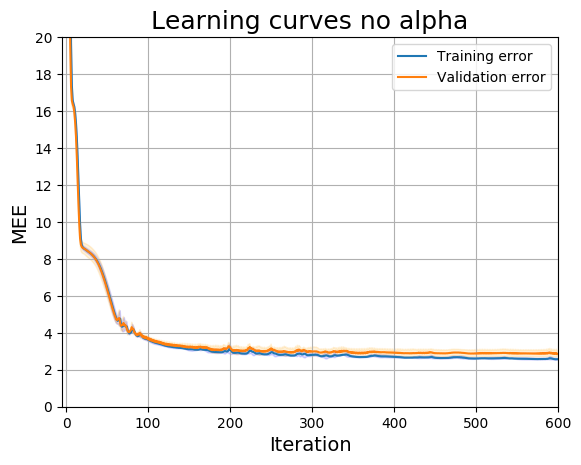

In [30]:
plt.style.use('default')

plt.plot(range(len(historyTr_NoReg_mean)),historyTr_NoReg_mean, label = 'Training error')
plt.fill_between(range(len(historyTr_NoReg_mean)), historyTr_NoReg_mean - historyTr_NoReg_sd, 
                 historyTr_NoReg_mean + historyTr_NoReg_sd, 
                 color='b', alpha=0.15)

plt.plot(range(len(historyVal_NoReg_mean)), historyVal_NoReg_mean, label = 'Validation error')
plt.fill_between(range(len(historyVal_NoReg_mean)), historyVal_NoReg_mean - historyVal_NoReg_sd, 
                 historyVal_NoReg_mean + historyVal_NoReg_sd, 
                 color='orange', alpha=0.15)

plt.ylabel('MEE', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning curves no alpha', fontsize = 18)
plt.legend()
plt.ylim(5,20)
plt.xlim(-5,600)
plt.yticks(np.arange(0, 21, +2))

plt.grid()

In [128]:
print("No regularization (no alpha) result:")
print("MEE on the validation",historyVal_NoReg_mean[-1],"with standard deviation",historyVal_NoReg_sd[-1])
print("MEE on the training",historyTr_NoReg_mean[-1],"with standard deviation",historyTr_NoReg_sd[-1])

No regularization (no alpha) result:
MEE on the validation 2.859019660949707 with standard deviation 0.17027188690564501
MEE on the training 2.5702057838439942 with standard deviation 0.055443494913659894


In [42]:
def create_model_Low_LR():
    # create model
    model = Sequential()
    model.add(Dense(mlpr.best_params_['unit1'], input_dim=10, activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(mlpr.best_params_['unit2'], activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=0.01, 
                                                            momentum=mlpr.best_params_['mom']))
    return model

In [43]:
historyVal_Low_LR = []
historyTr_Low_LR = []

#mc = ModelCheckpoint('best_modelLC2HL.h5', monitor='val_loss', save_best_only=True)

for traing_index, test_index in kf.split(X_dev):
    x_tr = X_dev[traing_index]
    y_tr = y_dev[traing_index]
    x_val = X_dev[test_index]
    y_val = y_dev[test_index]
    model=create_model_Low_LR()
    #model.add_loss(MEE_k)
    history=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=600, 
                      batch_size=1036).history
    historyVal_Low_LR.append(history['val_loss'])
    historyTr_Low_LR.append(history['loss'])
model=create_model_Low_LR()
#model.add_loss(MEE_k)
model.fit(X_dev, y_dev, epochs=600, 
                      batch_size=1036).history

Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 1s 520us/step - loss: 55.9093 - val_loss: 56.5554
Epoch 2/600
1036/1036 [==============================] - 0s 5us/step - loss: 55.8178 - val_loss: 56.4173
Epoch 3/600
1036/1036 [==============================] - 0s 6us/step - loss: 55.6800 - val_loss: 56.2555
Epoch 4/600
1036/1036 [==============================] - 0s 9us/step - loss: 55.5185 - val_loss: 56.0814
Epoch 5/600
1036/1036 [==============================] - 0s 7us/step - loss: 55.3448 - val_loss: 55.9004
Epoch 6/600
1036/1036 [==============================] - 0s 12us/step - loss: 55.1645 - val_loss: 55.7154
Epoch 7/600
1036/1036 [==============================] - 0s 8us/step - loss: 54.9799 - val_loss: 55.5277
Epoch 8/600
1036/1036 [==============================] - 0s 9us/step - loss: 54.7928 - val_loss: 55.3379
Epoch 9/600
1036/1036 [==============================] - 0s 13us/step - loss: 54.6035 - val_loss: 55.1462
Epoc

Epoch 78/600
1036/1036 [==============================] - 0s 12us/step - loss: 36.0354 - val_loss: 36.4216
Epoch 79/600
1036/1036 [==============================] - 0s 10us/step - loss: 35.7129 - val_loss: 36.0989
Epoch 80/600
1036/1036 [==============================] - 0s 7us/step - loss: 35.3903 - val_loss: 35.7764
Epoch 81/600
1036/1036 [==============================] - 0s 6us/step - loss: 35.0681 - val_loss: 35.4542
Epoch 82/600
1036/1036 [==============================] - 0s 9us/step - loss: 34.7463 - val_loss: 35.1325
Epoch 83/600
1036/1036 [==============================] - 0s 8us/step - loss: 34.4248 - val_loss: 34.8113
Epoch 84/600
1036/1036 [==============================] - 0s 7us/step - loss: 34.1040 - val_loss: 34.4908
Epoch 85/600
1036/1036 [==============================] - 0s 8us/step - loss: 33.7837 - val_loss: 34.1710
Epoch 86/600
1036/1036 [==============================] - 0s 8us/step - loss: 33.4644 - val_loss: 33.8521
Epoch 87/600
1036/1036 [====================

Epoch 155/600
1036/1036 [==============================] - 0s 9us/step - loss: 19.1332 - val_loss: 19.7035
Epoch 156/600
1036/1036 [==============================] - 0s 10us/step - loss: 19.0425 - val_loss: 19.6113
Epoch 157/600
1036/1036 [==============================] - 0s 9us/step - loss: 18.9532 - val_loss: 19.5204
Epoch 158/600
1036/1036 [==============================] - 0s 7us/step - loss: 18.8653 - val_loss: 19.4309
Epoch 159/600
1036/1036 [==============================] - 0s 9us/step - loss: 18.7786 - val_loss: 19.3427
Epoch 160/600
1036/1036 [==============================] - 0s 11us/step - loss: 18.6933 - val_loss: 19.2559
Epoch 161/600
1036/1036 [==============================] - 0s 11us/step - loss: 18.6093 - val_loss: 19.1702
Epoch 162/600
1036/1036 [==============================] - 0s 8us/step - loss: 18.5265 - val_loss: 19.0859
Epoch 163/600
1036/1036 [==============================] - 0s 8us/step - loss: 18.4449 - val_loss: 19.0027
Epoch 164/600
1036/1036 [=========

Epoch 232/600
1036/1036 [==============================] - 0s 12us/step - loss: 14.1578 - val_loss: 14.6759
Epoch 233/600
1036/1036 [==============================] - 0s 9us/step - loss: 14.0985 - val_loss: 14.6174
Epoch 234/600
1036/1036 [==============================] - 0s 8us/step - loss: 14.0393 - val_loss: 14.5591
Epoch 235/600
1036/1036 [==============================] - 0s 8us/step - loss: 13.9802 - val_loss: 14.5010
Epoch 236/600
1036/1036 [==============================] - 0s 7us/step - loss: 13.9213 - val_loss: 14.4431
Epoch 237/600
1036/1036 [==============================] - 0s 7us/step - loss: 13.8627 - val_loss: 14.3854
Epoch 238/600
1036/1036 [==============================] - 0s 7us/step - loss: 13.8042 - val_loss: 14.3280
Epoch 239/600
1036/1036 [==============================] - 0s 6us/step - loss: 13.7460 - val_loss: 14.2708
Epoch 240/600
1036/1036 [==============================] - 0s 5us/step - loss: 13.6880 - val_loss: 14.2139
Epoch 241/600
1036/1036 [===========

Epoch 309/600
1036/1036 [==============================] - 0s 7us/step - loss: 10.0355 - val_loss: 10.6992
Epoch 310/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.9920 - val_loss: 10.6578
Epoch 311/600
1036/1036 [==============================] - 0s 11us/step - loss: 9.9493 - val_loss: 10.6171
Epoch 312/600
1036/1036 [==============================] - 0s 13us/step - loss: 9.9072 - val_loss: 10.5771
Epoch 313/600
1036/1036 [==============================] - 0s 15us/step - loss: 9.8658 - val_loss: 10.5377
Epoch 314/600
1036/1036 [==============================] - 0s 10us/step - loss: 9.8251 - val_loss: 10.4989
Epoch 315/600
1036/1036 [==============================] - 0s 10us/step - loss: 9.7851 - val_loss: 10.4609
Epoch 316/600
1036/1036 [==============================] - 0s 12us/step - loss: 9.7459 - val_loss: 10.4235
Epoch 317/600
1036/1036 [==============================] - 0s 12us/step - loss: 9.7073 - val_loss: 10.3869
Epoch 318/600
1036/1036 [=============

Epoch 387/600
1036/1036 [==============================] - 0s 11us/step - loss: 8.4500 - val_loss: 9.1966
Epoch 388/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.4449 - val_loss: 9.1913
Epoch 389/600
1036/1036 [==============================] - 0s 15us/step - loss: 8.4398 - val_loss: 9.1860
Epoch 390/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.4349 - val_loss: 9.1809
Epoch 391/600
1036/1036 [==============================] - 0s 14us/step - loss: 8.4301 - val_loss: 9.1758
Epoch 392/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.4255 - val_loss: 9.1708
Epoch 393/600
1036/1036 [==============================] - 0s 13us/step - loss: 8.4209 - val_loss: 9.1659
Epoch 394/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.4164 - val_loss: 9.1611
Epoch 395/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.4120 - val_loss: 9.1563
Epoch 396/600
1036/1036 [========================

Epoch 465/600
1036/1036 [==============================] - 0s 11us/step - loss: 8.1824 - val_loss: 8.8998
Epoch 466/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.1792 - val_loss: 8.8965
Epoch 467/600
1036/1036 [==============================] - 0s 14us/step - loss: 8.1760 - val_loss: 8.8932
Epoch 468/600
1036/1036 [==============================] - 0s 13us/step - loss: 8.1728 - val_loss: 8.8898
Epoch 469/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.1695 - val_loss: 8.8865
Epoch 470/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.1663 - val_loss: 8.8831
Epoch 471/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.1630 - val_loss: 8.8798
Epoch 472/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.1597 - val_loss: 8.8764
Epoch 473/600
1036/1036 [==============================] - 0s 5us/step - loss: 8.1564 - val_loss: 8.8730
Epoch 474/600
1036/1036 [=========================

Epoch 543/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.8745 - val_loss: 8.6015
Epoch 544/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.8699 - val_loss: 8.5972
Epoch 545/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.8652 - val_loss: 8.5928
Epoch 546/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.8606 - val_loss: 8.5885
Epoch 547/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.8560 - val_loss: 8.5841
Epoch 548/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.8513 - val_loss: 8.5797
Epoch 549/600
1036/1036 [==============================] - 0s 6us/step - loss: 7.8467 - val_loss: 8.5754
Epoch 550/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.8420 - val_loss: 8.5710
Epoch 551/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.8374 - val_loss: 8.5666
Epoch 552/600
1036/1036 [==============================

Epoch 21/600
1036/1036 [==============================] - 0s 8us/step - loss: 53.7817 - val_loss: 55.3510
Epoch 22/600
1036/1036 [==============================] - 0s 11us/step - loss: 53.5958 - val_loss: 55.1649
Epoch 23/600
1036/1036 [==============================] - 0s 14us/step - loss: 53.4091 - val_loss: 54.9778
Epoch 24/600
1036/1036 [==============================] - 0s 12us/step - loss: 53.2216 - val_loss: 54.7897
Epoch 25/600
1036/1036 [==============================] - 0s 14us/step - loss: 53.0332 - val_loss: 54.6007
Epoch 26/600
1036/1036 [==============================] - 0s 9us/step - loss: 52.8437 - val_loss: 54.4106
Epoch 27/600
1036/1036 [==============================] - 0s 7us/step - loss: 52.6532 - val_loss: 54.2193
Epoch 28/600
1036/1036 [==============================] - 0s 15us/step - loss: 52.4614 - val_loss: 54.0268
Epoch 29/600
1036/1036 [==============================] - 0s 13us/step - loss: 52.2685 - val_loss: 53.8331
Epoch 30/600
1036/1036 [================

Epoch 98/600
1036/1036 [==============================] - 0s 9us/step - loss: 34.4148 - val_loss: 35.8612
Epoch 99/600
1036/1036 [==============================] - 0s 13us/step - loss: 34.0956 - val_loss: 35.5401
Epoch 100/600
1036/1036 [==============================] - 0s 12us/step - loss: 33.7761 - val_loss: 35.2185
Epoch 101/600
1036/1036 [==============================] - 0s 12us/step - loss: 33.4562 - val_loss: 34.8967
Epoch 102/600
1036/1036 [==============================] - 0s 13us/step - loss: 33.1362 - val_loss: 34.5748
Epoch 103/600
1036/1036 [==============================] - 0s 12us/step - loss: 32.8161 - val_loss: 34.2529
Epoch 104/600
1036/1036 [==============================] - 0s 6us/step - loss: 32.4963 - val_loss: 33.9311
Epoch 105/600
1036/1036 [==============================] - 0s 11us/step - loss: 32.1769 - val_loss: 33.6099
Epoch 106/600
1036/1036 [==============================] - 0s 9us/step - loss: 31.8580 - val_loss: 33.2891
Epoch 107/600
1036/1036 [========

Epoch 175/600
1036/1036 [==============================] - 0s 8us/step - loss: 18.7015 - val_loss: 19.7576
Epoch 176/600
1036/1036 [==============================] - 0s 8us/step - loss: 18.6243 - val_loss: 19.6694
Epoch 177/600
1036/1036 [==============================] - 0s 11us/step - loss: 18.5485 - val_loss: 19.5825
Epoch 178/600
1036/1036 [==============================] - 0s 10us/step - loss: 18.4738 - val_loss: 19.4966
Epoch 179/600
1036/1036 [==============================] - 0s 10us/step - loss: 18.4002 - val_loss: 19.4119
Epoch 180/600
1036/1036 [==============================] - 0s 13us/step - loss: 18.3279 - val_loss: 19.3284
Epoch 181/600
1036/1036 [==============================] - 0s 12us/step - loss: 18.2566 - val_loss: 19.2459
Epoch 182/600
1036/1036 [==============================] - 0s 7us/step - loss: 18.1863 - val_loss: 19.1645
Epoch 183/600
1036/1036 [==============================] - 0s 12us/step - loss: 18.1172 - val_loss: 19.0841
Epoch 184/600
1036/1036 [======

1036/1036 [==============================] - 0s 7us/step - loss: 14.2976 - val_loss: 14.6839
Epoch 252/600
1036/1036 [==============================] - 0s 11us/step - loss: 14.2345 - val_loss: 14.6147
Epoch 253/600
1036/1036 [==============================] - 0s 9us/step - loss: 14.1709 - val_loss: 14.5450
Epoch 254/600
1036/1036 [==============================] - 0s 7us/step - loss: 14.1067 - val_loss: 14.4748
Epoch 255/600
1036/1036 [==============================] - 0s 10us/step - loss: 14.0420 - val_loss: 14.4040
Epoch 256/600
1036/1036 [==============================] - 0s 13us/step - loss: 13.9768 - val_loss: 14.3329
Epoch 257/600
1036/1036 [==============================] - 0s 11us/step - loss: 13.9112 - val_loss: 14.2613
Epoch 258/600
1036/1036 [==============================] - 0s 12us/step - loss: 13.8452 - val_loss: 14.1893
Epoch 259/600
1036/1036 [==============================] - 0s 10us/step - loss: 13.7788 - val_loss: 14.1171
Epoch 260/600
1036/1036 [====================

Epoch 328/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.7568 - val_loss: 9.7980
Epoch 329/600
1036/1036 [==============================] - 0s 9us/step - loss: 9.7205 - val_loss: 9.7601
Epoch 330/600
1036/1036 [==============================] - 0s 12us/step - loss: 9.6851 - val_loss: 9.7231
Epoch 331/600
1036/1036 [==============================] - 0s 10us/step - loss: 9.6505 - val_loss: 9.6870
Epoch 332/600
1036/1036 [==============================] - 0s 6us/step - loss: 9.6166 - val_loss: 9.6517
Epoch 333/600
1036/1036 [==============================] - 0s 9us/step - loss: 9.5836 - val_loss: 9.6175
Epoch 334/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.5514 - val_loss: 9.5842
Epoch 335/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.5199 - val_loss: 9.5518
Epoch 336/600
1036/1036 [==============================] - 0s 11us/step - loss: 9.4892 - val_loss: 9.5202
Epoch 337/600
1036/1036 [===========================

Epoch 406/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.5505 - val_loss: 8.5942
Epoch 407/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.5466 - val_loss: 8.5905
Epoch 408/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.5427 - val_loss: 8.5870
Epoch 409/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.5389 - val_loss: 8.5835
Epoch 410/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.5352 - val_loss: 8.5802
Epoch 411/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.5317 - val_loss: 8.5769
Epoch 412/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.5282 - val_loss: 8.5737
Epoch 413/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.5247 - val_loss: 8.5707
Epoch 414/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.5214 - val_loss: 8.5676
Epoch 415/600
1036/1036 [=============================

Epoch 484/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3604 - val_loss: 8.4400
Epoch 485/600
1036/1036 [==============================] - 0s 5us/step - loss: 8.3586 - val_loss: 8.4385
Epoch 486/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3567 - val_loss: 8.4370
Epoch 487/600
1036/1036 [==============================] - 0s 5us/step - loss: 8.3548 - val_loss: 8.4355
Epoch 488/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3530 - val_loss: 8.4340
Epoch 489/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3512 - val_loss: 8.4325
Epoch 490/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3493 - val_loss: 8.4310
Epoch 491/600
1036/1036 [==============================] - 0s 11us/step - loss: 8.3474 - val_loss: 8.4295
Epoch 492/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3456 - val_loss: 8.4280
Epoch 493/600
1036/1036 [=============================

Epoch 562/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.2096 - val_loss: 8.3032
Epoch 563/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.2074 - val_loss: 8.3011
Epoch 564/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.2053 - val_loss: 8.2990
Epoch 565/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.2032 - val_loss: 8.2969
Epoch 566/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.2010 - val_loss: 8.2948
Epoch 567/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.1989 - val_loss: 8.2926
Epoch 568/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.1968 - val_loss: 8.2905
Epoch 569/600
1036/1036 [==============================] - 0s 15us/step - loss: 8.1946 - val_loss: 8.2883
Epoch 570/600
1036/1036 [==============================] - 0s 16us/step - loss: 8.1924 - val_loss: 8.2862
Epoch 571/600
1036/1036 [============================

Epoch 40/600
1036/1036 [==============================] - 0s 9us/step - loss: 49.4067 - val_loss: 48.9724
Epoch 41/600
1036/1036 [==============================] - 0s 9us/step - loss: 49.1762 - val_loss: 48.7396
Epoch 42/600
1036/1036 [==============================] - 0s 8us/step - loss: 48.9436 - val_loss: 48.5046
Epoch 43/600
1036/1036 [==============================] - 0s 9us/step - loss: 48.7086 - val_loss: 48.2674
Epoch 44/600
1036/1036 [==============================] - 0s 8us/step - loss: 48.4715 - val_loss: 48.0280
Epoch 45/600
1036/1036 [==============================] - 0s 9us/step - loss: 48.2320 - val_loss: 47.7863
Epoch 46/600
1036/1036 [==============================] - 0s 8us/step - loss: 47.9903 - val_loss: 47.5424
Epoch 47/600
1036/1036 [==============================] - 0s 8us/step - loss: 47.7465 - val_loss: 47.2963
Epoch 48/600
1036/1036 [==============================] - 0s 11us/step - loss: 47.5003 - val_loss: 47.0479
Epoch 49/600
1036/1036 [=====================

Epoch 194/600
1036/1036 [==============================] - 0s 7us/step - loss: 17.0571 - val_loss: 17.1484
Epoch 195/600
1036/1036 [==============================] - 0s 10us/step - loss: 16.9943 - val_loss: 17.0911
Epoch 196/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.9321 - val_loss: 17.0341
Epoch 197/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.8704 - val_loss: 16.9776
Epoch 198/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.8094 - val_loss: 16.9215
Epoch 199/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.7488 - val_loss: 16.8657
Epoch 200/600
1036/1036 [==============================] - 0s 9us/step - loss: 16.6888 - val_loss: 16.8103
Epoch 201/600
1036/1036 [==============================] - 0s 10us/step - loss: 16.6292 - val_loss: 16.7552
Epoch 202/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.5700 - val_loss: 16.7004
Epoch 203/600
1036/1036 [==========

Epoch 271/600
1036/1036 [==============================] - 0s 7us/step - loss: 12.8138 - val_loss: 13.0476
Epoch 272/600
1036/1036 [==============================] - 0s 6us/step - loss: 12.7600 - val_loss: 12.9937
Epoch 273/600
1036/1036 [==============================] - 0s 6us/step - loss: 12.7062 - val_loss: 12.9397
Epoch 274/600
1036/1036 [==============================] - 0s 5us/step - loss: 12.6523 - val_loss: 12.8854
Epoch 275/600
1036/1036 [==============================] - 0s 7us/step - loss: 12.5982 - val_loss: 12.8309
Epoch 276/600
1036/1036 [==============================] - 0s 5us/step - loss: 12.5439 - val_loss: 12.7762
Epoch 277/600
1036/1036 [==============================] - 0s 7us/step - loss: 12.4895 - val_loss: 12.7212
Epoch 278/600
1036/1036 [==============================] - 0s 6us/step - loss: 12.4349 - val_loss: 12.6659
Epoch 279/600
1036/1036 [==============================] - 0s 7us/step - loss: 12.3802 - val_loss: 12.6103
Epoch 280/600
1036/1036 [============

Epoch 348/600
1036/1036 [==============================] - 0s 7us/step - loss: 9.1716 - val_loss: 9.2223
Epoch 349/600
1036/1036 [==============================] - 0s 6us/step - loss: 9.1493 - val_loss: 9.1990
Epoch 350/600
1036/1036 [==============================] - 0s 7us/step - loss: 9.1278 - val_loss: 9.1766
Epoch 351/600
1036/1036 [==============================] - 0s 7us/step - loss: 9.1070 - val_loss: 9.1551
Epoch 352/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.0868 - val_loss: 9.1342
Epoch 353/600
1036/1036 [==============================] - 0s 10us/step - loss: 9.0673 - val_loss: 9.1141
Epoch 354/600
1036/1036 [==============================] - 0s 9us/step - loss: 9.0484 - val_loss: 9.0946
Epoch 355/600
1036/1036 [==============================] - 0s 10us/step - loss: 9.0300 - val_loss: 9.0757
Epoch 356/600
1036/1036 [==============================] - 0s 6us/step - loss: 9.0122 - val_loss: 9.0574
Epoch 357/600
1036/1036 [============================

Epoch 426/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.5071 - val_loss: 8.5172
Epoch 427/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.5044 - val_loss: 8.5141
Epoch 428/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.5018 - val_loss: 8.5111
Epoch 429/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.4991 - val_loss: 8.5081
Epoch 430/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.4965 - val_loss: 8.5052
Epoch 431/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.4939 - val_loss: 8.5023
Epoch 432/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.4914 - val_loss: 8.4994
Epoch 433/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.4888 - val_loss: 8.4965
Epoch 434/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.4863 - val_loss: 8.4937
Epoch 435/600
1036/1036 [==============================

1036/1036 [==============================] - 0s 9us/step - loss: 8.3299 - val_loss: 8.3337
Epoch 505/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3277 - val_loss: 8.3316
Epoch 506/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3254 - val_loss: 8.3295
Epoch 507/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.3232 - val_loss: 8.3273
Epoch 508/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3209 - val_loss: 8.3252
Epoch 509/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.3186 - val_loss: 8.3230
Epoch 510/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.3163 - val_loss: 8.3208
Epoch 511/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.3140 - val_loss: 8.3187
Epoch 512/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3117 - val_loss: 8.3165
Epoch 513/600
1036/1036 [==============================] - 0s 8us/ste

1036/1036 [==============================] - 0s 10us/step - loss: 8.1246 - val_loss: 8.1420
Epoch 583/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.1215 - val_loss: 8.1391
Epoch 584/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.1184 - val_loss: 8.1361
Epoch 585/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.1153 - val_loss: 8.1332
Epoch 586/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.1122 - val_loss: 8.1303
Epoch 587/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.1091 - val_loss: 8.1273
Epoch 588/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.1059 - val_loss: 8.1243
Epoch 589/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.1028 - val_loss: 8.1213
Epoch 590/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.0996 - val_loss: 8.1184
Epoch 591/600
1036/1036 [==============================] - 0s 8us/s

1036/1036 [==============================] - 0s 8us/step - loss: 44.4296 - val_loss: 43.9204
Epoch 60/600
1036/1036 [==============================] - 0s 5us/step - loss: 44.1591 - val_loss: 43.6476
Epoch 61/600
1036/1036 [==============================] - 0s 7us/step - loss: 43.8872 - val_loss: 43.3734
Epoch 62/600
1036/1036 [==============================] - 0s 10us/step - loss: 43.6138 - val_loss: 43.0976
Epoch 63/600
1036/1036 [==============================] - 0s 8us/step - loss: 43.3389 - val_loss: 42.8204
Epoch 64/600
1036/1036 [==============================] - 0s 7us/step - loss: 43.0626 - val_loss: 42.5418
Epoch 65/600
1036/1036 [==============================] - 0s 8us/step - loss: 42.7851 - val_loss: 42.2618
Epoch 66/600
1036/1036 [==============================] - 0s 7us/step - loss: 42.5060 - val_loss: 41.9804
Epoch 67/600
1036/1036 [==============================] - 0s 9us/step - loss: 42.2256 - val_loss: 41.6976
Epoch 68/600
1036/1036 [==============================] - 

Epoch 136/600
1036/1036 [==============================] - 0s 10us/step - loss: 23.3354 - val_loss: 22.5606
Epoch 137/600
1036/1036 [==============================] - 0s 11us/step - loss: 23.1619 - val_loss: 22.3816
Epoch 138/600
1036/1036 [==============================] - 0s 7us/step - loss: 22.9949 - val_loss: 22.2083
Epoch 139/600
1036/1036 [==============================] - 0s 8us/step - loss: 22.8345 - val_loss: 22.0406
Epoch 140/600
1036/1036 [==============================] - 0s 7us/step - loss: 22.6804 - val_loss: 21.8796
Epoch 141/600
1036/1036 [==============================] - 0s 8us/step - loss: 22.5320 - val_loss: 21.7249
Epoch 142/600
1036/1036 [==============================] - 0s 7us/step - loss: 22.3887 - val_loss: 21.5763
Epoch 143/600
1036/1036 [==============================] - 0s 6us/step - loss: 22.2496 - val_loss: 21.4320
Epoch 144/600
1036/1036 [==============================] - 0s 9us/step - loss: 22.1146 - val_loss: 21.2916
Epoch 145/600
1036/1036 [==========

Epoch 213/600
1036/1036 [==============================] - 0s 10us/step - loss: 16.3656 - val_loss: 15.3227
Epoch 214/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.3057 - val_loss: 15.2616
Epoch 215/600
1036/1036 [==============================] - 0s 8us/step - loss: 16.2461 - val_loss: 15.2008
Epoch 216/600
1036/1036 [==============================] - 0s 8us/step - loss: 16.1867 - val_loss: 15.1404
Epoch 217/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.1276 - val_loss: 15.0802
Epoch 218/600
1036/1036 [==============================] - 0s 9us/step - loss: 16.0687 - val_loss: 15.0203
Epoch 219/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.0101 - val_loss: 14.9607
Epoch 220/600
1036/1036 [==============================] - 0s 8us/step - loss: 15.9517 - val_loss: 14.9014
Epoch 221/600
1036/1036 [==============================] - 0s 7us/step - loss: 15.8935 - val_loss: 14.8424
Epoch 222/600
1036/1036 [===========

Epoch 290/600
1036/1036 [==============================] - 0s 8us/step - loss: 12.1419 - val_loss: 11.0055
Epoch 291/600
1036/1036 [==============================] - 0s 6us/step - loss: 12.0847 - val_loss: 10.9477
Epoch 292/600
1036/1036 [==============================] - 0s 8us/step - loss: 12.0274 - val_loss: 10.8899
Epoch 293/600
1036/1036 [==============================] - 0s 7us/step - loss: 11.9698 - val_loss: 10.8320
Epoch 294/600
1036/1036 [==============================] - 0s 7us/step - loss: 11.9120 - val_loss: 10.7742
Epoch 295/600
1036/1036 [==============================] - 0s 7us/step - loss: 11.8541 - val_loss: 10.7164
Epoch 296/600
1036/1036 [==============================] - 0s 7us/step - loss: 11.7961 - val_loss: 10.6587
Epoch 297/600
1036/1036 [==============================] - 0s 7us/step - loss: 11.7381 - val_loss: 10.6012
Epoch 298/600
1036/1036 [==============================] - 0s 8us/step - loss: 11.6800 - val_loss: 10.5438
Epoch 299/600
1036/1036 [============

Epoch 368/600
1036/1036 [==============================] - 0s 6us/step - loss: 9.1259 - val_loss: 8.1573
Epoch 369/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.1127 - val_loss: 8.1461
Epoch 370/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.0998 - val_loss: 8.1353
Epoch 371/600
1036/1036 [==============================] - 0s 6us/step - loss: 9.0872 - val_loss: 8.1248
Epoch 372/600
1036/1036 [==============================] - 0s 9us/step - loss: 9.0750 - val_loss: 8.1148
Epoch 373/600
1036/1036 [==============================] - 0s 6us/step - loss: 9.0631 - val_loss: 8.1050
Epoch 374/600
1036/1036 [==============================] - 0s 7us/step - loss: 9.0516 - val_loss: 8.0957
Epoch 375/600
1036/1036 [==============================] - 0s 8us/step - loss: 9.0404 - val_loss: 8.0867
Epoch 376/600
1036/1036 [==============================] - 0s 7us/step - loss: 9.0295 - val_loss: 8.0780
Epoch 377/600
1036/1036 [==============================

Epoch 446/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.6385 - val_loss: 7.8333
Epoch 447/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.6351 - val_loss: 7.8310
Epoch 448/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.6316 - val_loss: 7.8287
Epoch 449/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.6282 - val_loss: 7.8264
Epoch 450/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.6248 - val_loss: 7.8240
Epoch 451/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.6214 - val_loss: 7.8217
Epoch 452/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.6180 - val_loss: 7.8193
Epoch 453/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.6146 - val_loss: 7.8169
Epoch 454/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.6112 - val_loss: 7.8146
Epoch 455/600
1036/1036 [============================

Epoch 524/600
1036/1036 [==============================] - 0s 11us/step - loss: 8.3703 - val_loss: 7.6134
Epoch 525/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3665 - val_loss: 7.6100
Epoch 526/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.3628 - val_loss: 7.6066
Epoch 527/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.3590 - val_loss: 7.6032
Epoch 528/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3553 - val_loss: 7.5997
Epoch 529/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3515 - val_loss: 7.5963
Epoch 530/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3477 - val_loss: 7.5928
Epoch 531/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.3439 - val_loss: 7.5893
Epoch 532/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.3401 - val_loss: 7.5858
Epoch 533/600
1036/1036 [============================

Epoch 2/600
1036/1036 [==============================] - 0s 6us/step - loss: 58.4471 - val_loss: 56.1759
Epoch 3/600
1036/1036 [==============================] - 0s 6us/step - loss: 58.3091 - val_loss: 56.0157
Epoch 4/600
1036/1036 [==============================] - 0s 6us/step - loss: 58.1487 - val_loss: 55.8443
Epoch 5/600
1036/1036 [==============================] - 0s 6us/step - loss: 57.9770 - val_loss: 55.6676
Epoch 6/600
1036/1036 [==============================] - 0s 7us/step - loss: 57.7999 - val_loss: 55.4882
Epoch 7/600
1036/1036 [==============================] - 0s 6us/step - loss: 57.6201 - val_loss: 55.3076
Epoch 8/600
1036/1036 [==============================] - 0s 7us/step - loss: 57.4393 - val_loss: 55.1264
Epoch 9/600
1036/1036 [==============================] - 0s 7us/step - loss: 57.2576 - val_loss: 54.9447
Epoch 10/600
1036/1036 [==============================] - 0s 7us/step - loss: 57.0756 - val_loss: 54.7629
Epoch 11/600
1036/1036 [==============================

Epoch 80/600
1036/1036 [==============================] - 0s 9us/step - loss: 40.9685 - val_loss: 38.5746
Epoch 81/600
1036/1036 [==============================] - 0s 8us/step - loss: 40.6757 - val_loss: 38.2817
Epoch 82/600
1036/1036 [==============================] - 0s 7us/step - loss: 40.3815 - val_loss: 37.9876
Epoch 83/600
1036/1036 [==============================] - 0s 8us/step - loss: 40.0860 - val_loss: 37.6925
Epoch 84/600
1036/1036 [==============================] - 0s 6us/step - loss: 39.7895 - val_loss: 37.3963
Epoch 85/600
1036/1036 [==============================] - 0s 7us/step - loss: 39.4917 - val_loss: 37.0991
Epoch 86/600
1036/1036 [==============================] - 0s 6us/step - loss: 39.1929 - val_loss: 36.8011
Epoch 87/600
1036/1036 [==============================] - 0s 8us/step - loss: 38.8931 - val_loss: 36.5023
Epoch 88/600
1036/1036 [==============================] - 0s 7us/step - loss: 38.5925 - val_loss: 36.2028
Epoch 89/600
1036/1036 [======================

Epoch 157/600
1036/1036 [==============================] - 0s 6us/step - loss: 21.4999 - val_loss: 20.0836
Epoch 158/600
1036/1036 [==============================] - 0s 7us/step - loss: 21.3763 - val_loss: 19.9823
Epoch 159/600
1036/1036 [==============================] - 0s 9us/step - loss: 21.2552 - val_loss: 19.8832
Epoch 160/600
1036/1036 [==============================] - 0s 8us/step - loss: 21.1368 - val_loss: 19.7861
Epoch 161/600
1036/1036 [==============================] - 0s 8us/step - loss: 21.0207 - val_loss: 19.6910
Epoch 162/600
1036/1036 [==============================] - 0s 8us/step - loss: 20.9069 - val_loss: 19.5978
Epoch 163/600
1036/1036 [==============================] - 0s 6us/step - loss: 20.7953 - val_loss: 19.5064
Epoch 164/600
1036/1036 [==============================] - 0s 9us/step - loss: 20.6858 - val_loss: 19.4168
Epoch 165/600
1036/1036 [==============================] - 0s 6us/step - loss: 20.5784 - val_loss: 19.3288
Epoch 166/600
1036/1036 [============

Epoch 234/600
1036/1036 [==============================] - 0s 8us/step - loss: 16.0822 - val_loss: 15.7081
Epoch 235/600
1036/1036 [==============================] - 0s 7us/step - loss: 16.0365 - val_loss: 15.6696
Epoch 236/600
1036/1036 [==============================] - 0s 7us/step - loss: 15.9906 - val_loss: 15.6309
Epoch 237/600
1036/1036 [==============================] - 0s 8us/step - loss: 15.9444 - val_loss: 15.5918
Epoch 238/600
1036/1036 [==============================] - 0s 8us/step - loss: 15.8981 - val_loss: 15.5524
Epoch 239/600
1036/1036 [==============================] - 0s 7us/step - loss: 15.8515 - val_loss: 15.5125
Epoch 240/600
1036/1036 [==============================] - 0s 7us/step - loss: 15.8046 - val_loss: 15.4722
Epoch 241/600
1036/1036 [==============================] - 0s 10us/step - loss: 15.7574 - val_loss: 15.4314
Epoch 242/600
1036/1036 [==============================] - 0s 9us/step - loss: 15.7097 - val_loss: 15.3901
Epoch 243/600
1036/1036 [===========

Epoch 311/600
1036/1036 [==============================] - 0s 8us/step - loss: 11.3381 - val_loss: 11.3320
Epoch 312/600
1036/1036 [==============================] - 0s 9us/step - loss: 11.2783 - val_loss: 11.2759
Epoch 313/600
1036/1036 [==============================] - 0s 10us/step - loss: 11.2194 - val_loss: 11.2206
Epoch 314/600
1036/1036 [==============================] - 0s 8us/step - loss: 11.1611 - val_loss: 11.1660
Epoch 315/600
1036/1036 [==============================] - 0s 7us/step - loss: 11.1035 - val_loss: 11.1122
Epoch 316/600
1036/1036 [==============================] - 0s 8us/step - loss: 11.0468 - val_loss: 11.0592
Epoch 317/600
1036/1036 [==============================] - 0s 10us/step - loss: 10.9908 - val_loss: 11.0070
Epoch 318/600
1036/1036 [==============================] - 0s 11us/step - loss: 10.9357 - val_loss: 10.9555
Epoch 319/600
1036/1036 [==============================] - 0s 6us/step - loss: 10.8813 - val_loss: 10.9049
Epoch 320/600
1036/1036 [=========

Epoch 389/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.8890 - val_loss: 8.9887
Epoch 390/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.8781 - val_loss: 8.9770
Epoch 391/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.8674 - val_loss: 8.9655
Epoch 392/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.8571 - val_loss: 8.9543
Epoch 393/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.8469 - val_loss: 8.9433
Epoch 394/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.8370 - val_loss: 8.9326
Epoch 395/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.8273 - val_loss: 8.9221
Epoch 396/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.8178 - val_loss: 8.9118
Epoch 397/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.8086 - val_loss: 8.9018
Epoch 398/600
1036/1036 [============================

Epoch 467/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.4394 - val_loss: 8.5015
Epoch 468/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.4355 - val_loss: 8.4975
Epoch 469/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.4317 - val_loss: 8.4935
Epoch 470/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.4278 - val_loss: 8.4895
Epoch 471/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.4240 - val_loss: 8.4855
Epoch 472/600
1036/1036 [==============================] - 0s 9us/step - loss: 8.4201 - val_loss: 8.4816
Epoch 473/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.4163 - val_loss: 8.4776
Epoch 474/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.4124 - val_loss: 8.4737
Epoch 475/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.4085 - val_loss: 8.4697
Epoch 476/600
1036/1036 [==============================

Epoch 545/600
1036/1036 [==============================] - 0s 6us/step - loss: 8.1067 - val_loss: 8.1784
Epoch 546/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.1018 - val_loss: 8.1739
Epoch 547/600
1036/1036 [==============================] - 0s 5us/step - loss: 8.0970 - val_loss: 8.1693
Epoch 548/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.0921 - val_loss: 8.1647
Epoch 549/600
1036/1036 [==============================] - 0s 5us/step - loss: 8.0872 - val_loss: 8.1601
Epoch 550/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.0823 - val_loss: 8.1555
Epoch 551/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.0774 - val_loss: 8.1508
Epoch 552/600
1036/1036 [==============================] - 0s 7us/step - loss: 8.0724 - val_loss: 8.1462
Epoch 553/600
1036/1036 [==============================] - 0s 8us/step - loss: 8.0675 - val_loss: 8.1416
Epoch 554/600
1036/1036 [==============================

Epoch 28/600
1295/1295 [==============================] - 0s 13us/step - loss: 5.4974
Epoch 29/600
1295/1295 [==============================] - 0s 10us/step - loss: 5.3292
Epoch 30/600
1295/1295 [==============================] - 0s 10us/step - loss: 5.0337
Epoch 31/600
1295/1295 [==============================] - 0s 7us/step - loss: 4.8376
Epoch 32/600
1295/1295 [==============================] - 0s 9us/step - loss: 4.5093
Epoch 33/600
1295/1295 [==============================] - 0s 8us/step - loss: 4.2616
Epoch 34/600
1295/1295 [==============================] - ETA: 0s - loss: 4.140 - 0s 8us/step - loss: 4.1394
Epoch 35/600
1295/1295 [==============================] - 0s 14us/step - loss: 3.9709
Epoch 36/600
1295/1295 [==============================] - 0s 9us/step - loss: 3.8604
Epoch 37/600
1295/1295 [==============================] - 0s 7us/step - loss: 4.3663
Epoch 38/600
1295/1295 [==============================] - 0s 8us/step - loss: 4.5191
Epoch 39/600
1295/1295 [=============

1295/1295 [==============================] - 0s 10us/step - loss: 2.6576
Epoch 218/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.7442
Epoch 219/600
1295/1295 [==============================] - 0s 11us/step - loss: 2.7446
Epoch 220/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.6767
Epoch 221/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.6513
Epoch 222/600
1295/1295 [==============================] - 0s 12us/step - loss: 2.6797
Epoch 223/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.7803
Epoch 224/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.8421
Epoch 225/600
1295/1295 [==============================] - 0s 12us/step - loss: 2.6327
Epoch 226/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.5992
Epoch 227/600
1295/1295 [==============================] - 0s 13us/step - loss: 2.6090
Epoch 228/600
1295/1295 [==============================] - 0s 1

1295/1295 [==============================] - 0s 7us/step - loss: 2.9001
Epoch 313/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.6226
Epoch 314/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6184
Epoch 315/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.5584
Epoch 316/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.5809
Epoch 317/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.6064
Epoch 318/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.7291
Epoch 319/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.5567
Epoch 320/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.5988
Epoch 321/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.7040
Epoch 322/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.5570
Epoch 323/600
1295/1295 [==============================] - 0s 6us/st

Epoch 407/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.6245
Epoch 408/600
1295/1295 [==============================] - 0s 7us/step - loss: 2.6483
Epoch 409/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.5521
Epoch 410/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.5295
Epoch 411/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.7200
Epoch 412/600
1295/1295 [==============================] - 0s 9us/step - loss: 2.4799
Epoch 413/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.5300
Epoch 414/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.5607
Epoch 415/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.6415
Epoch 416/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.4970
Epoch 417/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4701
Epoch 418/600
1295/1295 [=============================

Epoch 596/600
1295/1295 [==============================] - 0s 13us/step - loss: 2.4870
Epoch 597/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.4487
Epoch 598/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.6444
Epoch 599/600
1295/1295 [==============================] - 0s 6us/step - loss: 2.4447
Epoch 600/600
1295/1295 [==============================] - 0s 8us/step - loss: 2.4522


{'loss': [57.21454772949219,
  50.687165069580075,
  37.54488182067871,
  21.51938591003418,
  16.847016525268554,
  16.24608325958252,
  15.524640655517578,
  14.274700355529784,
  12.17860107421875,
  9.801820182800293,
  8.811099243164062,
  8.615861129760741,
  8.52487735748291,
  8.409569549560548,
  8.276469612121582,
  8.156628227233886,
  7.9920989036560055,
  7.813495445251465,
  7.614495277404785,
  7.364999771118164,
  7.1605480194091795,
  6.923810863494873,
  6.666667175292969,
  6.4254988670349125,
  6.189587116241455,
  5.971698379516601,
  5.763789463043213,
  5.497400188446045,
  5.329218769073487,
  5.033742237091064,
  4.837559223175049,
  4.509328556060791,
  4.261570739746094,
  4.139410400390625,
  3.9709015846252442,
  3.860390615463257,
  4.366285037994385,
  4.519093608856201,
  3.8685631275177004,
  3.704967212677002,
  3.9000033855438234,
  4.367709445953369,
  3.688839626312256,
  3.5196534633636474,
  3.7051074504852295,
  3.6757468700408937,
  3.3549910068

In [44]:
historyVal_Low_LR_mean=np.mean(historyVal_Low_LR, axis=0)
historyTr_Low_LR_mean=np.mean(historyTr_Low_LR, axis=0)

historyVal_Low_LR_sd=np.std(historyVal_Low_LR, axis=0)
historyTr_Low_LR_sd=np.std(historyTr_Low_LR, axis=0)

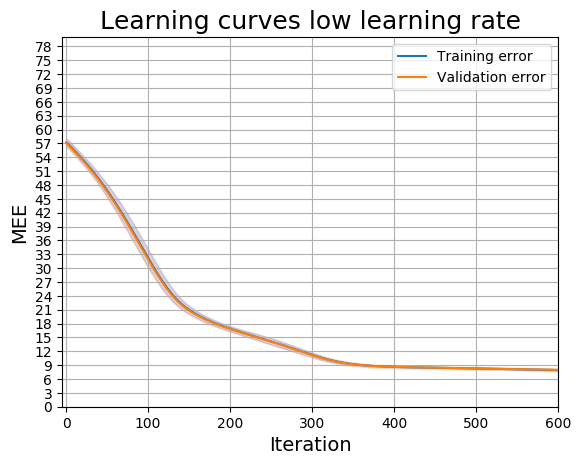

In [45]:
plt.style.use('default')

plt.plot(range(len(historyTr_Low_LR_mean)),historyTr_Low_LR_mean, label = 'Training error')
plt.fill_between(range(len(historyTr_Low_LR_mean)), historyTr_Low_LR_mean - historyTr_Low_LR_sd, 
                 historyTr_Low_LR_mean + historyTr_Low_LR_sd, 
                 color='b', alpha=0.15)

plt.plot(range(len(historyVal_Low_LR_mean)), historyVal_Low_LR_mean, label = 'Validation error')
plt.fill_between(range(len(historyVal_Low_LR_mean)), historyVal_Low_LR_mean - historyVal_Low_LR_sd, 
                 historyVal_Low_LR_mean + historyVal_Low_LR_sd, 
                 color='orange', alpha=0.15)

plt.ylabel('MEE', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning curves low learning rate', fontsize = 18)
plt.legend()
plt.ylim(5,80)
plt.xlim(-5,600)
plt.yticks(np.arange(0, 81, +3))

plt.grid()

In [130]:
print("Low regularization (lr=0.01) result:")
print("MEE on the validation",historyVal_Low_LR_mean[-1],"with standard deviation",historyVal_Low_LR_sd[-1])
print("MEE on the training",historyTr_Low_LR_mean[-1],"with standard deviation",historyTr_Low_LR_sd[-1])

Low regularization (lr=0.01) result:
MEE on the validation 7.975345325469971 with standard deviation 0.3599013297792157
MEE on the training 7.935428237915039 with standard deviation 0.19395151580301634


In [54]:
def create_model_MB():
    # create model
    model = Sequential()
    model.add(Dense(mlpr.best_params_['unit1'], input_dim=10, activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(mlpr.best_params_['unit2'], activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=0.1, 
                                                            momentum=mlpr.best_params_['mom']))
    return model

In [55]:
historyVal_MB = []
historyTr_MB = []

#mc = ModelCheckpoint('best_modelLC2HL.h5', monitor='val_loss', save_best_only=True)

for traing_index, test_index in kf.split(X_dev):
    x_tr = X_dev[traing_index]
    y_tr = y_dev[traing_index]
    x_val = X_dev[test_index]
    y_val = y_dev[test_index]
    model=create_model_MB()
    #model.add_loss(MEE_k)
    history=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=600, 
                      batch_size=100).history
    historyVal_MB.append(history['val_loss'])
    historyTr_MB.append(history['loss'])
model=create_model_MB()
#model.add_loss(MEE_k)
model.fit(X_dev, y_dev, epochs=600, 
                      batch_size=100).history

Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 1s 778us/step - loss: 48.0144 - val_loss: 35.7221
Epoch 2/600
1036/1036 [==============================] - 0s 33us/step - loss: 22.4505 - val_loss: 16.6197
Epoch 3/600
1036/1036 [==============================] - 0s 36us/step - loss: 14.2318 - val_loss: 11.1148
Epoch 4/600
1036/1036 [==============================] - 0s 42us/step - loss: 9.4326 - val_loss: 8.6313
Epoch 5/600
1036/1036 [==============================] - 0s 38us/step - loss: 8.3233 - val_loss: 8.4736
Epoch 6/600
1036/1036 [==============================] - 0s 41us/step - loss: 7.9449 - val_loss: 7.9329
Epoch 7/600
1036/1036 [==============================] - 0s 37us/step - loss: 7.4196 - val_loss: 7.3512
Epoch 8/600
1036/1036 [==============================] - 0s 38us/step - loss: 6.7684 - val_loss: 6.6035
Epoch 9/600
1036/1036 [==============================] - 0s 35us/step - loss: 6.1395 - val_loss: 5.8583
Epoch 10/6

1036/1036 [==============================] - 0s 25us/step - loss: 2.4637 - val_loss: 2.7270
Epoch 156/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.4851 - val_loss: 2.6736
Epoch 157/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.5208 - val_loss: 2.6099
Epoch 158/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.4712 - val_loss: 2.6433
Epoch 159/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.4796 - val_loss: 2.6491
Epoch 160/600
1036/1036 [==============================] - 0s 33us/step - loss: 2.4954 - val_loss: 2.6300
Epoch 161/600
1036/1036 [==============================] - 0s 41us/step - loss: 2.4548 - val_loss: 2.6036
Epoch 162/600
1036/1036 [==============================] - 0s 35us/step - loss: 2.4774 - val_loss: 2.6369
Epoch 163/600
1036/1036 [==============================] - 0s 37us/step - loss: 2.4913 - val_loss: 2.5917
Epoch 164/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 27us/step - loss: 2.2700 - val_loss: 2.6413
Epoch 310/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.2607 - val_loss: 2.6189
Epoch 311/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.2539 - val_loss: 2.7820
Epoch 312/600
1036/1036 [==============================] - 0s 24us/step - loss: 2.2770 - val_loss: 2.7187
Epoch 313/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.2501 - val_loss: 2.7857
Epoch 314/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2937 - val_loss: 2.6120
Epoch 315/600
1036/1036 [==============================] - 0s 24us/step - loss: 2.2474 - val_loss: 2.6714
Epoch 316/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.2387 - val_loss: 2.6046
Epoch 317/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.2645 - val_loss: 2.6030
Epoch 318/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 27us/step - loss: 2.1309 - val_loss: 2.7121
Epoch 464/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1403 - val_loss: 2.7506
Epoch 465/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.1337 - val_loss: 2.7576
Epoch 466/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.1434 - val_loss: 2.7109
Epoch 467/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.0951 - val_loss: 2.7592
Epoch 468/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.0690 - val_loss: 2.7445
Epoch 469/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1468 - val_loss: 2.7443
Epoch 470/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1139 - val_loss: 2.7760
Epoch 471/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.1609 - val_loss: 2.7678
Epoch 472/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 29us/step - loss: 3.6074 - val_loss: 3.7418
Epoch 18/600
1036/1036 [==============================] - 0s 29us/step - loss: 3.4585 - val_loss: 3.5388
Epoch 19/600
1036/1036 [==============================] - 0s 26us/step - loss: 3.4076 - val_loss: 3.4866
Epoch 20/600
1036/1036 [==============================] - 0s 27us/step - loss: 3.2887 - val_loss: 3.4639
Epoch 21/600
1036/1036 [==============================] - 0s 27us/step - loss: 3.1980 - val_loss: 3.5107
Epoch 22/600
1036/1036 [==============================] - 0s 26us/step - loss: 3.1582 - val_loss: 3.7810
Epoch 23/600
1036/1036 [==============================] - 0s 26us/step - loss: 3.1694 - val_loss: 3.4256
Epoch 24/600
1036/1036 [==============================] - 0s 28us/step - loss: 3.0553 - val_loss: 3.3117
Epoch 25/600
1036/1036 [==============================] - 0s 29us/step - loss: 3.0174 - val_loss: 3.4425
Epoch 26/600
1036/1036 [==============================] - 0s 29us/st

1036/1036 [==============================] - 0s 28us/step - loss: 2.3746 - val_loss: 3.0161
Epoch 173/600
1036/1036 [==============================] - 0s 41us/step - loss: 2.3896 - val_loss: 2.9960
Epoch 174/600
1036/1036 [==============================] - 0s 39us/step - loss: 2.4036 - val_loss: 3.0360
Epoch 175/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.3903 - val_loss: 2.9902
Epoch 176/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.3831 - val_loss: 3.0273
Epoch 177/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.3999 - val_loss: 2.9238
Epoch 178/600
1036/1036 [==============================] - 0s 31us/step - loss: 2.3905 - val_loss: 2.9557
Epoch 179/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.3662 - val_loss: 2.9884
Epoch 180/600
1036/1036 [==============================] - 0s 31us/step - loss: 2.4076 - val_loss: 2.9527
Epoch 181/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 28us/step - loss: 2.1332 - val_loss: 3.0353
Epoch 327/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.1553 - val_loss: 3.0164
Epoch 328/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1662 - val_loss: 3.0858
Epoch 329/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1677 - val_loss: 3.0192
Epoch 330/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1577 - val_loss: 2.9115
Epoch 331/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1584 - val_loss: 2.9530
Epoch 332/600
1036/1036 [==============================] - 0s 29us/step - loss: 2.1349 - val_loss: 2.9160
Epoch 333/600
1036/1036 [==============================] - 0s 31us/step - loss: 2.1546 - val_loss: 2.9833
Epoch 334/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1584 - val_loss: 2.9427
Epoch 335/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 34us/step - loss: 1.9803 - val_loss: 3.0373
Epoch 481/600
1036/1036 [==============================] - 0s 32us/step - loss: 1.9997 - val_loss: 2.9749
Epoch 482/600
1036/1036 [==============================] - 0s 30us/step - loss: 1.9864 - val_loss: 3.0585
Epoch 483/600
1036/1036 [==============================] - 0s 28us/step - loss: 1.9908 - val_loss: 3.2164
Epoch 484/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.0056 - val_loss: 3.1118
Epoch 485/600
1036/1036 [==============================] - 0s 29us/step - loss: 1.9998 - val_loss: 3.1182
Epoch 486/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.0247 - val_loss: 3.0106
Epoch 487/600
1036/1036 [==============================] - 0s 26us/step - loss: 1.9866 - val_loss: 3.0204
Epoch 488/600
1036/1036 [==============================] - 0s 26us/step - loss: 1.9930 - val_loss: 3.0605
Epoch 489/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 28us/step - loss: 2.9691 - val_loss: 2.8836
Epoch 35/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.9624 - val_loss: 2.8330
Epoch 36/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.9782 - val_loss: 2.8060
Epoch 37/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.9265 - val_loss: 2.8228
Epoch 38/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.8937 - val_loss: 2.8006
Epoch 39/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.8949 - val_loss: 2.8649
Epoch 40/600
1036/1036 [==============================] - 0s 31us/step - loss: 2.8931 - val_loss: 2.9915
Epoch 41/600
1036/1036 [==============================] - 0s 38us/step - loss: 2.8775 - val_loss: 2.8716
Epoch 42/600
1036/1036 [==============================] - 0s 54us/step - loss: 2.8750 - val_loss: 2.8813
Epoch 43/600
1036/1036 [==============================] - 0s 50us/st

1036/1036 [==============================] - 0s 35us/step - loss: 2.5982 - val_loss: 2.6256
Epoch 113/600
1036/1036 [==============================] - 0s 33us/step - loss: 2.5886 - val_loss: 2.5664
Epoch 114/600
1036/1036 [==============================] - 0s 36us/step - loss: 2.5793 - val_loss: 2.6955
Epoch 115/600
1036/1036 [==============================] - 0s 33us/step - loss: 2.5784 - val_loss: 2.5852
Epoch 116/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.5607 - val_loss: 2.5921
Epoch 117/600
1036/1036 [==============================] - 0s 31us/step - loss: 2.5503 - val_loss: 2.5625
Epoch 118/600
1036/1036 [==============================] - 0s 40us/step - loss: 2.5468 - val_loss: 2.6184
Epoch 119/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.5989 - val_loss: 2.5621
Epoch 120/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.5560 - val_loss: 2.5765
Epoch 121/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 26us/step - loss: 2.2958 - val_loss: 2.5988
Epoch 267/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2843 - val_loss: 2.6046
Epoch 268/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.3087 - val_loss: 2.6263
Epoch 269/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2844 - val_loss: 2.6508
Epoch 270/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.3088 - val_loss: 2.5897
Epoch 271/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2729 - val_loss: 2.6209
Epoch 272/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.2925 - val_loss: 2.5821
Epoch 273/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.3013 - val_loss: 2.5591
Epoch 274/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2720 - val_loss: 2.5976
Epoch 275/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 27us/step - loss: 2.0859 - val_loss: 2.7144
Epoch 421/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1143 - val_loss: 2.6883
Epoch 422/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.0756 - val_loss: 2.7536
Epoch 423/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1002 - val_loss: 2.6703
Epoch 424/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.1260 - val_loss: 2.7310
Epoch 425/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1274 - val_loss: 2.6969
Epoch 426/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.0889 - val_loss: 2.7032
Epoch 427/600
1036/1036 [==============================] - 0s 30us/step - loss: 2.0893 - val_loss: 2.6509
Epoch 428/600
1036/1036 [==============================] - 0s 30us/step - loss: 2.0945 - val_loss: 2.7094
Epoch 429/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 27us/step - loss: 1.9117 - val_loss: 2.8232
Epoch 575/600
1036/1036 [==============================] - 0s 27us/step - loss: 1.9559 - val_loss: 2.7865
Epoch 576/600
1036/1036 [==============================] - 0s 25us/step - loss: 1.9351 - val_loss: 2.7369
Epoch 577/600
1036/1036 [==============================] - 0s 28us/step - loss: 1.9167 - val_loss: 2.7308
Epoch 578/600
1036/1036 [==============================] - 0s 28us/step - loss: 1.9072 - val_loss: 2.7263
Epoch 579/600
1036/1036 [==============================] - 0s 28us/step - loss: 1.9452 - val_loss: 2.7604
Epoch 580/600
1036/1036 [==============================] - 0s 28us/step - loss: 1.9047 - val_loss: 2.7266
Epoch 581/600
1036/1036 [==============================] - 0s 27us/step - loss: 1.8968 - val_loss: 2.7716
Epoch 582/600
1036/1036 [==============================] - 0s 27us/step - loss: 1.9323 - val_loss: 2.7494
Epoch 583/600
1036/1036 [==============================] - 0

Epoch 129/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.5484 - val_loss: 2.8216
Epoch 130/600
1036/1036 [==============================] - 0s 33us/step - loss: 2.5227 - val_loss: 2.8861
Epoch 131/600
1036/1036 [==============================] - 0s 34us/step - loss: 2.5465 - val_loss: 2.8004
Epoch 132/600
1036/1036 [==============================] - 0s 30us/step - loss: 2.5425 - val_loss: 2.8273
Epoch 133/600
1036/1036 [==============================] - 0s 42us/step - loss: 2.5353 - val_loss: 2.8018
Epoch 134/600
1036/1036 [==============================] - 0s 38us/step - loss: 2.5383 - val_loss: 2.8297
Epoch 135/600
1036/1036 [==============================] - 0s 35us/step - loss: 2.5390 - val_loss: 2.8060
Epoch 136/600
1036/1036 [==============================] - 0s 33us/step - loss: 2.5217 - val_loss: 2.8031
Epoch 137/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.5395 - val_loss: 2.8501
Epoch 138/600
1036/1036 [=====================

1036/1036 [==============================] - 0s 28us/step - loss: 2.2673 - val_loss: 2.8121
Epoch 284/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2824 - val_loss: 2.7449
Epoch 285/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.2658 - val_loss: 3.0119
Epoch 286/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2985 - val_loss: 2.7852
Epoch 287/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.2792 - val_loss: 2.8685
Epoch 288/600
1036/1036 [==============================] - 0s 29us/step - loss: 2.2803 - val_loss: 2.7795
Epoch 289/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2829 - val_loss: 2.7745
Epoch 290/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.2576 - val_loss: 2.8187
Epoch 291/600
1036/1036 [==============================] - 0s 29us/step - loss: 2.2486 - val_loss: 2.8152
Epoch 292/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 32us/step - loss: 2.1227 - val_loss: 2.8577
Epoch 438/600
1036/1036 [==============================] - 0s 29us/step - loss: 2.1315 - val_loss: 2.8274
Epoch 439/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1116 - val_loss: 2.8742
Epoch 440/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1159 - val_loss: 2.8664
Epoch 441/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1002 - val_loss: 2.8554
Epoch 442/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.1104 - val_loss: 2.8984
Epoch 443/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.1346 - val_loss: 2.8099
Epoch 444/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.0973 - val_loss: 2.8457
Epoch 445/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.0830 - val_loss: 2.8531
Epoch 446/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 28us/step - loss: 1.9556 - val_loss: 2.9056
Epoch 592/600
1036/1036 [==============================] - 0s 28us/step - loss: 1.9305 - val_loss: 2.9225
Epoch 593/600
1036/1036 [==============================] - 0s 26us/step - loss: 1.9862 - val_loss: 3.0164
Epoch 594/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.0573 - val_loss: 2.8800
Epoch 595/600
1036/1036 [==============================] - 0s 26us/step - loss: 1.9493 - val_loss: 2.8532
Epoch 596/600
1036/1036 [==============================] - 0s 29us/step - loss: 1.9559 - val_loss: 2.9418
Epoch 597/600
1036/1036 [==============================] - 0s 32us/step - loss: 1.9602 - val_loss: 2.8903
Epoch 598/600
1036/1036 [==============================] - 0s 26us/step - loss: 1.9638 - val_loss: 2.9388
Epoch 599/600
1036/1036 [==============================] - 0s 30us/step - loss: 1.9280 - val_loss: 2.9130
Epoch 600/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 34us/step - loss: 2.4811 - val_loss: 2.8020
Epoch 146/600
1036/1036 [==============================] - 0s 39us/step - loss: 2.4871 - val_loss: 2.7917
Epoch 147/600
1036/1036 [==============================] - 0s 34us/step - loss: 2.4505 - val_loss: 2.8434
Epoch 148/600
1036/1036 [==============================] - 0s 41us/step - loss: 2.4608 - val_loss: 2.7809
Epoch 149/600
1036/1036 [==============================] - 0s 39us/step - loss: 2.4705 - val_loss: 2.7565
Epoch 150/600
1036/1036 [==============================] - 0s 33us/step - loss: 2.4681 - val_loss: 2.7997
Epoch 151/600
1036/1036 [==============================] - 0s 36us/step - loss: 2.4422 - val_loss: 2.7463
Epoch 152/600
1036/1036 [==============================] - 0s 34us/step - loss: 2.4422 - val_loss: 2.8080
Epoch 153/600
1036/1036 [==============================] - 0s 34us/step - loss: 2.4779 - val_loss: 2.7994
Epoch 154/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 33us/step - loss: 2.2380 - val_loss: 2.8788
Epoch 300/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.2540 - val_loss: 2.7700
Epoch 301/600
1036/1036 [==============================] - 0s 34us/step - loss: 2.2116 - val_loss: 2.7654
Epoch 302/600
1036/1036 [==============================] - 0s 35us/step - loss: 2.2633 - val_loss: 2.7856
Epoch 303/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.2124 - val_loss: 2.7259
Epoch 304/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.2119 - val_loss: 2.8438
Epoch 305/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.2284 - val_loss: 2.8572
Epoch 306/600
1036/1036 [==============================] - 0s 31us/step - loss: 2.2307 - val_loss: 2.8114
Epoch 307/600
1036/1036 [==============================] - 0s 32us/step - loss: 2.2174 - val_loss: 2.8598
Epoch 308/600
1036/1036 [==============================] - 0

1036/1036 [==============================] - 0s 28us/step - loss: 2.0389 - val_loss: 2.8501
Epoch 454/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.0336 - val_loss: 2.8663
Epoch 455/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.0533 - val_loss: 2.8621
Epoch 456/600
1036/1036 [==============================] - 0s 27us/step - loss: 2.0531 - val_loss: 2.8832
Epoch 457/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.0842 - val_loss: 2.8271
Epoch 458/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.0302 - val_loss: 2.8591
Epoch 459/600
1036/1036 [==============================] - 0s 26us/step - loss: 2.0255 - val_loss: 2.8787
Epoch 460/600
1036/1036 [==============================] - 0s 25us/step - loss: 2.0473 - val_loss: 2.8514
Epoch 461/600
1036/1036 [==============================] - 0s 28us/step - loss: 2.0333 - val_loss: 2.9243
Epoch 462/600
1036/1036 [==============================] - E

Epoch 9/600
1295/1295 [==============================] - 0s 22us/step - loss: 5.5715
Epoch 10/600
1295/1295 [==============================] - 0s 24us/step - loss: 5.0258
Epoch 11/600
1295/1295 [==============================] - 0s 22us/step - loss: 4.5912
Epoch 12/600
1295/1295 [==============================] - 0s 23us/step - loss: 4.2455
Epoch 13/600
1295/1295 [==============================] - 0s 21us/step - loss: 3.9945
Epoch 14/600
1295/1295 [==============================] - 0s 21us/step - loss: 3.8027
Epoch 15/600
1295/1295 [==============================] - 0s 21us/step - loss: 3.6540
Epoch 16/600
1295/1295 [==============================] - 0s 23us/step - loss: 3.5291
Epoch 17/600
1295/1295 [==============================] - 0s 23us/step - loss: 3.3942
Epoch 18/600
1295/1295 [==============================] - 0s 28us/step - loss: 3.3205
Epoch 19/600
1295/1295 [==============================] - 0s 30us/step - loss: 3.2231
Epoch 20/600
1295/1295 [==============================]

1295/1295 [==============================] - 0s 26us/step - loss: 2.3788
Epoch 199/600
1295/1295 [==============================] - 0s 24us/step - loss: 2.3726
Epoch 200/600
1295/1295 [==============================] - 0s 23us/step - loss: 2.3690
Epoch 201/600
1295/1295 [==============================] - 0s 24us/step - loss: 2.3688
Epoch 202/600
1295/1295 [==============================] - 0s 27us/step - loss: 2.3431
Epoch 203/600
1295/1295 [==============================] - 0s 25us/step - loss: 2.3487
Epoch 204/600
1295/1295 [==============================] - 0s 26us/step - loss: 2.3442
Epoch 205/600
1295/1295 [==============================] - 0s 21us/step - loss: 2.3482
Epoch 206/600
1295/1295 [==============================] - 0s 25us/step - loss: 2.3519
Epoch 207/600
1295/1295 [==============================] - 0s 25us/step - loss: 2.3422
Epoch 208/600
1295/1295 [==============================] - 0s 28us/step - loss: 2.3413
Epoch 209/600
1295/1295 [==============================] 

1295/1295 [==============================] - 0s 27us/step - loss: 2.1505
Epoch 387/600
1295/1295 [==============================] - 0s 28us/step - loss: 2.1324
Epoch 388/600
1295/1295 [==============================] - 0s 27us/step - loss: 2.1196
Epoch 389/600
1295/1295 [==============================] - 0s 25us/step - loss: 2.1347
Epoch 390/600
1295/1295 [==============================] - 0s 26us/step - loss: 2.1434
Epoch 391/600
1295/1295 [==============================] - 0s 24us/step - loss: 2.1085
Epoch 392/600
1295/1295 [==============================] - 0s 21us/step - loss: 2.1155
Epoch 393/600
1295/1295 [==============================] - 0s 22us/step - loss: 2.0995
Epoch 394/600
1295/1295 [==============================] - 0s 20us/step - loss: 2.1112
Epoch 395/600
1295/1295 [==============================] - 0s 21us/step - loss: 2.1261
Epoch 396/600
1295/1295 [==============================] - 0s 21us/step - loss: 2.0967
Epoch 397/600
1295/1295 [==============================] 

1295/1295 [==============================] - 0s 21us/step - loss: 1.9466
Epoch 575/600
1295/1295 [==============================] - 0s 22us/step - loss: 1.9496
Epoch 576/600
1295/1295 [==============================] - 0s 24us/step - loss: 2.0122
Epoch 577/600
1295/1295 [==============================] - 0s 24us/step - loss: 1.9629
Epoch 578/600
1295/1295 [==============================] - 0s 21us/step - loss: 1.9502
Epoch 579/600
1295/1295 [==============================] - 0s 22us/step - loss: 1.9354
Epoch 580/600
1295/1295 [==============================] - 0s 21us/step - loss: 1.9657
Epoch 581/600
1295/1295 [==============================] - 0s 21us/step - loss: 1.9448
Epoch 582/600
1295/1295 [==============================] - 0s 23us/step - loss: 1.9618
Epoch 583/600
1295/1295 [==============================] - 0s 21us/step - loss: 1.9471
Epoch 584/600
1295/1295 [==============================] - 0s 21us/step - loss: 1.9462
Epoch 585/600
1295/1295 [==============================] 

{'loss': [47.71822115629336,
  20.752952634597836,
  12.886550038017361,
  8.678712553959556,
  8.186094571264555,
  7.664249768128267,
  6.98977111573385,
  6.259163906215241,
  5.571497241502563,
  5.025753621429089,
  4.591214375146107,
  4.245512371357804,
  3.9944746733632326,
  3.80270427902693,
  3.653968800909271,
  3.529076778750622,
  3.394178450337708,
  3.320511351220856,
  3.2231376097469258,
  3.1716814188423306,
  3.111392694090324,
  3.0677951339589122,
  3.0400381060640784,
  3.0111432185964695,
  2.9796638359894625,
  2.9850314556401667,
  2.96694633859465,
  2.921040579158827,
  2.9790591889826947,
  2.942086970944202,
  2.920601294307635,
  2.927325275413778,
  2.876489597858149,
  2.8848930758398934,
  2.877695959047001,
  2.8463409812293916,
  2.867390535052679,
  2.8118120546966905,
  2.855732456597582,
  2.813886986736165,
  2.7839913009216426,
  2.782824843086331,
  2.8324673010115458,
  2.7880777410558752,
  2.7808937161125273,
  2.767457884711188,
  2.7879894

In [56]:
historyVal_MB_mean=np.mean(historyVal_MB, axis=0)
historyTr_MB_mean=np.mean(historyTr_MB, axis=0)

historyVal_MB_sd=np.std(historyVal_MB, axis=0)
historyTr_MB_sd=np.std(historyTr_MB, axis=0)

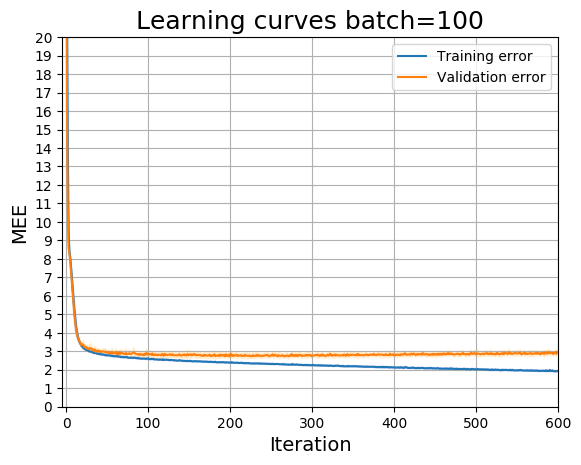

In [57]:
plt.style.use('default')

plt.plot(range(len(historyTr_MB_mean)),historyTr_MB_mean, label = 'Training error')
plt.fill_between(range(len(historyTr_MB_mean)), historyTr_MB_mean - historyTr_MB_sd, 
                 historyTr_MB_mean + historyTr_MB_sd, 
                 color='b', alpha=0.15)

plt.plot(range(len(historyVal_MB_mean)), historyVal_MB_mean, label = 'Validation error')
plt.fill_between(range(len(historyVal_MB_mean)), historyVal_MB_mean - historyVal_MB_sd, 
                 historyVal_MB_mean + historyVal_MB_sd, 
                 color='orange', alpha=0.15)

plt.ylabel('MEE', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning curves batch=100', fontsize = 18)
plt.legend()
plt.ylim(5,20)
plt.xlim(-5,600)
plt.yticks(np.arange(0, 21, +1))

plt.grid()

In [131]:
print("Mini batch (mb=100) result:")
print("MEE on the validation",historyVal_MB_mean[-1],"with standard deviation",historyVal_MB_sd[-1])
print("MEE on the training",historyTr_MB_mean[-1],"with standard deviation",historyTr_MB_sd[-1])

Mini batch (mb=100) result:
MEE on the validation 2.9553233279224527 with standard deviation 0.1293055552691295
MEE on the training 1.9266514322472355 with standard deviation 0.032017323828517234


In [58]:
def create_model_OL():
    # create model
    model = Sequential()
    model.add(Dense(mlpr.best_params_['unit1'], input_dim=10, activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(mlpr.best_params_['unit2'], activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=0.01, 
                                                            momentum=mlpr.best_params_['mom']))
    return model

In [63]:
historyVal_OL = []
historyTr_OL = []

#mc = ModelCheckpoint('best_modelLC2HL.h5', monitor='val_loss', save_best_only=True)

for traing_index, test_index in kf.split(X_dev):
    x_tr = X_dev[traing_index]
    y_tr = y_dev[traing_index]
    x_val = X_dev[test_index]
    y_val = y_dev[test_index]
    model=create_model_OL()
    #model.add_loss(MEE_k)
    history=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=100, batch_size=1).history
    historyVal_OL.append(history['val_loss'])
    historyTr_OL.append(history['loss'])
#model=create_model_OL()
#model.add_loss(MEE_k)
#model.fit(X_dev, y_dev, epochs=100, 
                    #  batch_size=1).history

Train on 1036 samples, validate on 259 samples
Epoch 1/100
1036/1036 [==============================] - 4s 4ms/step - loss: 13.8126 - val_loss: 4.9088
Epoch 2/100
1036/1036 [==============================] - 3s 2ms/step - loss: 4.2563 - val_loss: 3.3821
Epoch 3/100
1036/1036 [==============================] - 2s 2ms/step - loss: 3.4978 - val_loss: 3.4666
Epoch 4/100
1036/1036 [==============================] - 2s 2ms/step - loss: 3.3586 - val_loss: 2.9561
Epoch 5/100
1036/1036 [==============================] - 2s 2ms/step - loss: 3.2141 - val_loss: 3.0558
Epoch 6/100
1036/1036 [==============================] - 2s 2ms/step - loss: 3.1323 - val_loss: 3.2348
Epoch 7/100
1036/1036 [==============================] - 2s 2ms/step - loss: 3.1121 - val_loss: 2.7659
Epoch 8/100
1036/1036 [==============================] - 2s 2ms/step - loss: 3.0413 - val_loss: 3.0975
Epoch 9/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.9821 - val_loss: 3.0786
Epoch 10/100
1036/1036 [=

1036/1036 [==============================] - 2s 2ms/step - loss: 2.4479 - val_loss: 2.6188
Epoch 58/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.4402 - val_loss: 2.7328
Epoch 59/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.4254 - val_loss: 2.6890
Epoch 60/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.4175 - val_loss: 2.6676
Epoch 61/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.4293 - val_loss: 2.6759
Epoch 62/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.3835 - val_loss: 2.6619
Epoch 63/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.3994 - val_loss: 2.7072
Epoch 64/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.3813 - val_loss: 2.6673
Epoch 65/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.3629 - val_loss: 3.0680
Epoch 66/100
1036/1036 [==============================] - 2s 2ms/step - loss:

1036/1036 [==============================] - 2s 2ms/step - loss: 2.9096 - val_loss: 2.8889
Epoch 14/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.8453 - val_loss: 2.7390
Epoch 15/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.8231 - val_loss: 2.7694
Epoch 16/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.7858 - val_loss: 3.1161
Epoch 17/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.7696 - val_loss: 2.8142
Epoch 18/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.7766 - val_loss: 2.7968
Epoch 19/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.7484 - val_loss: 2.8546
Epoch 20/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.7279 - val_loss: 2.6720
Epoch 21/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.7473 - val_loss: 2.7943
Epoch 22/100
1036/1036 [==============================] - 2s 2ms/step - loss:

Epoch 92/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2615 - val_loss: 2.7380
Epoch 93/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2285 - val_loss: 2.6795
Epoch 94/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2146 - val_loss: 2.6717
Epoch 95/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2512 - val_loss: 3.0509
Epoch 96/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2332 - val_loss: 2.9374
Epoch 97/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2091 - val_loss: 2.8069
Epoch 98/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2053 - val_loss: 2.7354
Epoch 99/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.2080 - val_loss: 2.8373
Epoch 100/100
1036/1036 [==============================] - 2s 2ms/step - loss: 2.1903 - val_loss: 2.7172
Train on 1036 samples, validate on 259 samples
Epoch 1/100
1036

In [64]:
historyVal_OL_mean=np.mean(historyVal_OL, axis=0)
historyTr_OL_mean=np.mean(historyTr_OL, axis=0)

historyVal_OL_sd=np.std(historyVal_OL, axis=0)
historyTr_OL_sd=np.std(historyTr_OL, axis=0)

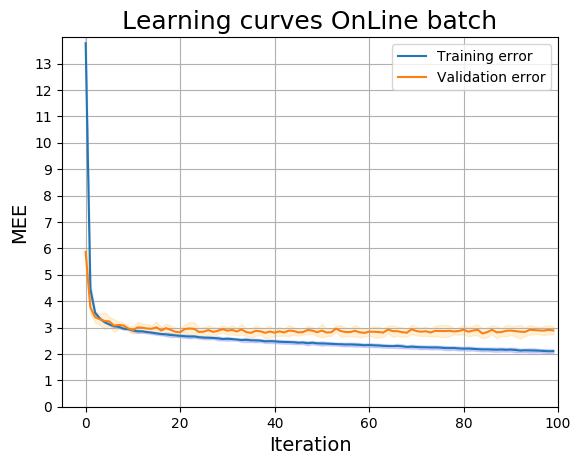

In [68]:
plt.style.use('default')

plt.plot(range(len(historyTr_OL_mean)),historyTr_OL_mean, label = 'Training error')
plt.fill_between(range(len(historyTr_OL_mean)), historyTr_OL_mean - historyTr_OL_sd, 
                 historyTr_OL_mean + historyTr_OL_sd, 
                 color='b', alpha=0.15)

plt.plot(range(len(historyVal_OL_mean)), historyVal_OL_mean, label = 'Validation error')
plt.fill_between(range(len(historyVal_OL_mean)), historyVal_OL_mean - historyVal_OL_sd, 
                 historyVal_OL_mean + historyVal_OL_sd, 
                 color='orange', alpha=0.15)

plt.ylabel('MEE', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning curves OnLine batch', fontsize = 18)
plt.legend()
plt.ylim(5,14)
plt.xlim(-5,100)
plt.yticks(np.arange(0, 14, +1))

plt.grid()

In [132]:
print("OnLine batch result:")
print("MEE on the validation",historyVal_OL_mean[-1],"with standard deviation",historyVal_OL_sd[-1])
print("MEE on the training",historyTr_OL_mean[-1],"with standard deviation",historyTr_OL_sd[-1])

OnLine batch result:
MEE on the validation 2.8882639716433283 with standard deviation 0.1489354257559105
MEE on the training 2.104787623708255 with standard deviation 0.07363679605818553


In [135]:
def create_model_LM():
    # create model
    model = Sequential()
    model.add(Dense(mlpr.best_params_['unit1'], input_dim=10, activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(mlpr.best_params_['unit2'], activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=mlpr.best_params_['lr'], 
                                                            momentum=0.01))
    return model

In [136]:
historyVal_LM = []
historyTr_LM = []

#mc = ModelCheckpoint('best_modelLC2HL.h5', monitor='val_loss', save_best_only=True)

for traing_index, test_index in kf.split(X_dev):
    x_tr = X_dev[traing_index]
    y_tr = y_dev[traing_index]
    x_val = X_dev[test_index]
    y_val = y_dev[test_index]
    model=create_model_LM()
    history=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=600, batch_size=1036).history
    historyVal_LM.append(history['val_loss'])
    historyTr_LM.append(history['loss'])


Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 2s 2ms/step - loss: 56.7479 - val_loss: 54.3446
Epoch 2/600
1036/1036 [==============================] - 0s 10us/step - loss: 54.0587 - val_loss: 51.5404
Epoch 3/600
1036/1036 [==============================] - 0s 7us/step - loss: 51.2613 - val_loss: 48.3691
Epoch 4/600
1036/1036 [==============================] - 0s 9us/step - loss: 48.0955 - val_loss: 44.6562
Epoch 5/600
1036/1036 [==============================] - 0s 18us/step - loss: 44.3867 - val_loss: 40.3805
Epoch 6/600
1036/1036 [==============================] - 0s 12us/step - loss: 40.1149 - val_loss: 35.6602
Epoch 7/600
1036/1036 [==============================] - 0s 9us/step - loss: 35.4019 - val_loss: 30.7534
Epoch 8/600
1036/1036 [==============================] - 0s 15us/step - loss: 30.5079 - val_loss: 26.1873
Epoch 9/600
1036/1036 [==============================] - 0s 15us/step - loss: 25.9444 - val_loss: 22.5889
Epo

Epoch 79/600
1036/1036 [==============================] - 0s 13us/step - loss: 5.5793 - val_loss: 5.5225
Epoch 80/600
1036/1036 [==============================] - 0s 14us/step - loss: 5.5973 - val_loss: 5.5441
Epoch 81/600
1036/1036 [==============================] - 0s 16us/step - loss: 5.4342 - val_loss: 5.3731
Epoch 82/600
1036/1036 [==============================] - 0s 10us/step - loss: 5.4587 - val_loss: 5.3914
Epoch 83/600
1036/1036 [==============================] - 0s 12us/step - loss: 5.3076 - val_loss: 5.2431
Epoch 84/600
1036/1036 [==============================] - 0s 17us/step - loss: 5.3394 - val_loss: 5.2530
Epoch 85/600
1036/1036 [==============================] - 0s 11us/step - loss: 5.1941 - val_loss: 5.1243
Epoch 86/600
1036/1036 [==============================] - 0s 8us/step - loss: 5.2303 - val_loss: 5.1260
Epoch 87/600
1036/1036 [==============================] - 0s 9us/step - loss: 5.0908 - val_loss: 5.0132
Epoch 88/600
1036/1036 [==============================] -

Epoch 157/600
1036/1036 [==============================] - 0s 21us/step - loss: 3.8475 - val_loss: 3.8656
Epoch 158/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.9205 - val_loss: 3.7508
Epoch 159/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.8327 - val_loss: 3.8520
Epoch 160/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.9034 - val_loss: 3.7391
Epoch 161/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.8193 - val_loss: 3.8391
Epoch 162/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.8873 - val_loss: 3.7279
Epoch 163/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.8066 - val_loss: 3.8265
Epoch 164/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.8716 - val_loss: 3.7172
Epoch 165/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.7944 - val_loss: 3.8140
Epoch 166/600
1036/1036 [======================

Epoch 235/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.4905 - val_loss: 3.5026
Epoch 236/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.4701 - val_loss: 3.4579
Epoch 237/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.4850 - val_loss: 3.4974
Epoch 238/600
1036/1036 [==============================] - 0s 17us/step - loss: 3.4644 - val_loss: 3.4537
Epoch 239/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.4797 - val_loss: 3.4922
Epoch 240/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.4589 - val_loss: 3.4495
Epoch 241/600
1036/1036 [==============================] - 0s 35us/step - loss: 3.4746 - val_loss: 3.4871
Epoch 242/600
1036/1036 [==============================] - 0s 24us/step - loss: 3.4536 - val_loss: 3.4453
Epoch 243/600
1036/1036 [==============================] - 0s 19us/step - loss: 3.4695 - val_loss: 3.4821
Epoch 244/600
1036/1036 [======================

Epoch 313/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.2984 - val_loss: 3.3199
Epoch 314/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2922 - val_loss: 3.3058
Epoch 315/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2955 - val_loss: 3.3170
Epoch 316/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2897 - val_loss: 3.3040
Epoch 317/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.2929 - val_loss: 3.3143
Epoch 318/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2873 - val_loss: 3.3024
Epoch 319/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2905 - val_loss: 3.3118
Epoch 320/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2851 - val_loss: 3.3011
Epoch 321/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2884 - val_loss: 3.3094
Epoch 322/600
1036/1036 [======================

Epoch 391/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0831 - val_loss: 3.1358
Epoch 392/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1133 - val_loss: 3.1521
Epoch 393/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.0790 - val_loss: 3.1327
Epoch 394/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1086 - val_loss: 3.1489
Epoch 395/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.0754 - val_loss: 3.1301
Epoch 396/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.1044 - val_loss: 3.1459
Epoch 397/600
1036/1036 [==============================] - 0s 22us/step - loss: 3.0721 - val_loss: 3.1276
Epoch 398/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.1005 - val_loss: 3.1431
Epoch 399/600
1036/1036 [==============================] - 0s 23us/step - loss: 3.0688 - val_loss: 3.1252
Epoch 400/600
1036/1036 [======================

Epoch 469/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1613 - val_loss: 3.2177
Epoch 470/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.1534 - val_loss: 3.1918
Epoch 471/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1564 - val_loss: 3.2135
Epoch 472/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1490 - val_loss: 3.1887
Epoch 473/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1519 - val_loss: 3.2099
Epoch 474/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1451 - val_loss: 3.1860
Epoch 475/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.1478 - val_loss: 3.2067
Epoch 476/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.1416 - val_loss: 3.1834
Epoch 477/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1442 - val_loss: 3.2039
Epoch 478/600
1036/1036 [==========================

Epoch 547/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.0815 - val_loss: 3.1573
Epoch 548/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.0789 - val_loss: 3.1320
Epoch 549/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.0797 - val_loss: 3.1560
Epoch 550/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.0774 - val_loss: 3.1307
Epoch 551/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.0779 - val_loss: 3.1547
Epoch 552/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.0759 - val_loss: 3.1294
Epoch 553/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.0762 - val_loss: 3.1533
Epoch 554/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0743 - val_loss: 3.1281
Epoch 555/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.0744 - val_loss: 3.1520
Epoch 556/600
1036/1036 [=====================

Epoch 24/600
1036/1036 [==============================] - 0s 15us/step - loss: 9.4615 - val_loss: 8.8122
Epoch 25/600
1036/1036 [==============================] - 0s 11us/step - loss: 9.0766 - val_loss: 8.6342
Epoch 26/600
1036/1036 [==============================] - 0s 45us/step - loss: 8.8228 - val_loss: 8.5465
Epoch 27/600
1036/1036 [==============================] - 0s 17us/step - loss: 8.6651 - val_loss: 8.5156
Epoch 28/600
1036/1036 [==============================] - 0s 15us/step - loss: 8.5661 - val_loss: 8.4926
Epoch 29/600
1036/1036 [==============================] - 0s 19us/step - loss: 8.5003 - val_loss: 8.4782
Epoch 30/600
1036/1036 [==============================] - 0s 11us/step - loss: 8.4510 - val_loss: 8.4563
Epoch 31/600
1036/1036 [==============================] - 0s 15us/step - loss: 8.4087 - val_loss: 8.4341
Epoch 32/600
1036/1036 [==============================] - 0s 15us/step - loss: 8.3687 - val_loss: 8.4039
Epoch 33/600
1036/1036 [==============================]

Epoch 103/600
1036/1036 [==============================] - 0s 11us/step - loss: 4.4054 - val_loss: 4.4788
Epoch 104/600
1036/1036 [==============================] - 0s 12us/step - loss: 4.3937 - val_loss: 4.2658
Epoch 105/600
1036/1036 [==============================] - 0s 14us/step - loss: 4.3606 - val_loss: 4.4292
Epoch 106/600
1036/1036 [==============================] - 0s 12us/step - loss: 4.3480 - val_loss: 4.2270
Epoch 107/600
1036/1036 [==============================] - 0s 9us/step - loss: 4.3186 - val_loss: 4.3855
Epoch 108/600
1036/1036 [==============================] - 0s 10us/step - loss: 4.3079 - val_loss: 4.1920
Epoch 109/600
1036/1036 [==============================] - 0s 7us/step - loss: 4.2797 - val_loss: 4.3460
Epoch 110/600
1036/1036 [==============================] - 0s 8us/step - loss: 4.2717 - val_loss: 4.1552
Epoch 111/600
1036/1036 [==============================] - 0s 8us/step - loss: 4.2389 - val_loss: 4.3063
Epoch 112/600
1036/1036 [=========================

Epoch 181/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.6434 - val_loss: 3.7625
Epoch 182/600
1036/1036 [==============================] - 0s 19us/step - loss: 3.6862 - val_loss: 3.6025
Epoch 183/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.6310 - val_loss: 3.7511
Epoch 184/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.6747 - val_loss: 3.5900
Epoch 185/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.6175 - val_loss: 3.7388
Epoch 186/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.6626 - val_loss: 3.5773
Epoch 187/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.6039 - val_loss: 3.7268
Epoch 188/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.6506 - val_loss: 3.5650
Epoch 189/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.5909 - val_loss: 3.7153
Epoch 190/600
1036/1036 [======================

Epoch 259/600
1036/1036 [==============================] - 0s 21us/step - loss: 3.3663 - val_loss: 3.4759
Epoch 260/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.4130 - val_loss: 3.3612
Epoch 261/600
1036/1036 [==============================] - 0s 17us/step - loss: 3.3627 - val_loss: 3.4714
Epoch 262/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.4091 - val_loss: 3.3583
Epoch 263/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.3592 - val_loss: 3.4670
Epoch 264/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.4052 - val_loss: 3.3554
Epoch 265/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.3556 - val_loss: 3.4626
Epoch 266/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.4013 - val_loss: 3.3525
Epoch 267/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.3521 - val_loss: 3.4583
Epoch 268/600
1036/1036 [=====================

Epoch 337/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.2546 - val_loss: 3.3383
Epoch 338/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.2905 - val_loss: 3.2712
Epoch 339/600
1036/1036 [==============================] - 0s 36us/step - loss: 3.2515 - val_loss: 3.3352
Epoch 340/600
1036/1036 [==============================] - 0s 26us/step - loss: 3.2872 - val_loss: 3.2685
Epoch 341/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2483 - val_loss: 3.3319
Epoch 342/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.2839 - val_loss: 3.2657
Epoch 343/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2451 - val_loss: 3.3287
Epoch 344/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.2805 - val_loss: 3.2630
Epoch 345/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2420 - val_loss: 3.3253
Epoch 346/600
1036/1036 [======================

Epoch 415/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1594 - val_loss: 3.2457
Epoch 416/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1896 - val_loss: 3.1971
Epoch 417/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.1574 - val_loss: 3.2419
Epoch 418/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1861 - val_loss: 3.1952
Epoch 419/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.1549 - val_loss: 3.2451
Epoch 420/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.1891 - val_loss: 3.1962
Epoch 421/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1550 - val_loss: 3.2424
Epoch 422/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1868 - val_loss: 3.1950
Epoch 423/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.1529 - val_loss: 3.2406
Epoch 424/600
1036/1036 [=========================

Epoch 493/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0955 - val_loss: 3.1979
Epoch 494/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1262 - val_loss: 3.1535
Epoch 495/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.0942 - val_loss: 3.1969
Epoch 496/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1248 - val_loss: 3.1527
Epoch 497/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0929 - val_loss: 3.1958
Epoch 498/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1234 - val_loss: 3.1520
Epoch 499/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0917 - val_loss: 3.1949
Epoch 500/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1220 - val_loss: 3.1512
Epoch 501/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0904 - val_loss: 3.1939
Epoch 502/600
1036/1036 [==============================

Epoch 571/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0491 - val_loss: 3.1704
Epoch 572/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0787 - val_loss: 3.1233
Epoch 573/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0478 - val_loss: 3.1698
Epoch 574/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0775 - val_loss: 3.1222
Epoch 575/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0465 - val_loss: 3.1693
Epoch 576/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0762 - val_loss: 3.1212
Epoch 577/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0452 - val_loss: 3.1687
Epoch 578/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0750 - val_loss: 3.1201
Epoch 579/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.0439 - val_loss: 3.1681
Epoch 580/600
1036/1036 [===========================

Epoch 49/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.6951 - val_loss: 7.0955
Epoch 50/600
1036/1036 [==============================] - 0s 15us/step - loss: 7.6301 - val_loss: 7.0344
Epoch 51/600
1036/1036 [==============================] - 0s 14us/step - loss: 7.5635 - val_loss: 6.9737
Epoch 52/600
1036/1036 [==============================] - 0s 10us/step - loss: 7.4954 - val_loss: 6.9110
Epoch 53/600
1036/1036 [==============================] - 0s 15us/step - loss: 7.4258 - val_loss: 6.8490
Epoch 54/600
1036/1036 [==============================] - 0s 10us/step - loss: 7.3549 - val_loss: 6.7800
Epoch 55/600
1036/1036 [==============================] - 0s 12us/step - loss: 7.2824 - val_loss: 6.7185
Epoch 56/600
1036/1036 [==============================] - 0s 12us/step - loss: 7.2084 - val_loss: 6.6438
Epoch 57/600
1036/1036 [==============================] - 0s 10us/step - loss: 7.1327 - val_loss: 6.5819
Epoch 58/600
1036/1036 [==============================] 

Epoch 127/600
1036/1036 [==============================] - 0s 19us/step - loss: 4.0561 - val_loss: 4.3577
Epoch 128/600
1036/1036 [==============================] - 0s 17us/step - loss: 4.0247 - val_loss: 4.0320
Epoch 129/600
1036/1036 [==============================] - 0s 12us/step - loss: 4.0319 - val_loss: 4.3327
Epoch 130/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.9982 - val_loss: 4.0079
Epoch 131/600
1036/1036 [==============================] - 0s 17us/step - loss: 4.0054 - val_loss: 4.3051
Epoch 132/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.9701 - val_loss: 3.9832
Epoch 133/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.9777 - val_loss: 4.2786
Epoch 134/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.9434 - val_loss: 3.9590
Epoch 135/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.9502 - val_loss: 4.2548
Epoch 136/600
1036/1036 [=====================

Epoch 205/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.4247 - val_loss: 3.7597
Epoch 206/600
1036/1036 [==============================] - 0s 19us/step - loss: 3.4298 - val_loss: 3.4570
Epoch 207/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.4200 - val_loss: 3.7554
Epoch 208/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.4258 - val_loss: 3.4538
Epoch 209/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.4164 - val_loss: 3.7511
Epoch 210/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.4218 - val_loss: 3.4505
Epoch 211/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.4127 - val_loss: 3.7456
Epoch 212/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.4170 - val_loss: 3.4470
Epoch 213/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.4088 - val_loss: 3.7352
Epoch 214/600
1036/1036 [=======================

Epoch 283/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.2564 - val_loss: 3.5747
Epoch 284/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.2576 - val_loss: 3.3239
Epoch 285/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.2526 - val_loss: 3.5711
Epoch 286/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.2541 - val_loss: 3.3212
Epoch 287/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2489 - val_loss: 3.5677
Epoch 288/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.2507 - val_loss: 3.3160
Epoch 289/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2414 - val_loss: 3.5615
Epoch 290/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2451 - val_loss: 3.3128
Epoch 291/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2370 - val_loss: 3.5577
Epoch 292/600
1036/1036 [==========================

Epoch 361/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1248 - val_loss: 3.4568
Epoch 362/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.1323 - val_loss: 3.2308
Epoch 363/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1221 - val_loss: 3.4545
Epoch 364/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1296 - val_loss: 3.2294
Epoch 365/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1198 - val_loss: 3.4524
Epoch 366/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1272 - val_loss: 3.2282
Epoch 367/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1177 - val_loss: 3.4505
Epoch 368/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.1249 - val_loss: 3.2271
Epoch 369/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1158 - val_loss: 3.4487
Epoch 370/600
1036/1036 [===========================

Epoch 439/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0582 - val_loss: 3.3958
Epoch 440/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.0547 - val_loss: 3.1981
Epoch 441/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.0566 - val_loss: 3.3945
Epoch 442/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.0529 - val_loss: 3.1974
Epoch 443/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.0550 - val_loss: 3.3932
Epoch 444/600
1036/1036 [==============================] - 0s 32us/step - loss: 3.0510 - val_loss: 3.1966
Epoch 445/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.0534 - val_loss: 3.3919
Epoch 446/600
1036/1036 [==============================] - 0s 17us/step - loss: 3.0492 - val_loss: 3.1959
Epoch 447/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.0518 - val_loss: 3.3906
Epoch 448/600
1036/1036 [=====================

Epoch 517/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.0000 - val_loss: 3.3515
Epoch 518/600
1036/1036 [==============================] - 0s 17us/step - loss: 2.9905 - val_loss: 3.1718
Epoch 519/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9986 - val_loss: 3.3505
Epoch 520/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9890 - val_loss: 3.1711
Epoch 521/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.9971 - val_loss: 3.3496
Epoch 522/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9875 - val_loss: 3.1705
Epoch 523/600
1036/1036 [==============================] - 0s 17us/step - loss: 2.9957 - val_loss: 3.3486
Epoch 524/600
1036/1036 [==============================] - 0s 16us/step - loss: 2.9861 - val_loss: 3.1698
Epoch 525/600
1036/1036 [==============================] - 0s 14us/step - loss: 2.9943 - val_loss: 3.3476
Epoch 526/600
1036/1036 [======================

Epoch 595/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.9444 - val_loss: 3.3156
Epoch 596/600
1036/1036 [==============================] - 0s 15us/step - loss: 2.9340 - val_loss: 3.1487
Epoch 597/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9429 - val_loss: 3.3147
Epoch 598/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9325 - val_loss: 3.1481
Epoch 599/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9414 - val_loss: 3.3137
Epoch 600/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9310 - val_loss: 3.1476
Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 2s 2ms/step - loss: 58.2616 - val_loss: 55.8689
Epoch 2/600
1036/1036 [==============================] - 0s 10us/step - loss: 55.6307 - val_loss: 53.3547
Epoch 3/600
1036/1036 [==============================] - 0s 11us/step - loss: 53.1153 - val_loss: 50.6455
E

Epoch 73/600
1036/1036 [==============================] - 0s 17us/step - loss: 5.5702 - val_loss: 5.4479
Epoch 74/600
1036/1036 [==============================] - 0s 9us/step - loss: 5.6192 - val_loss: 5.6301
Epoch 75/600
1036/1036 [==============================] - 0s 8us/step - loss: 5.4176 - val_loss: 5.2987
Epoch 76/600
1036/1036 [==============================] - 0s 9us/step - loss: 5.4518 - val_loss: 5.4894
Epoch 77/600
1036/1036 [==============================] - 0s 11us/step - loss: 5.2706 - val_loss: 5.1565
Epoch 78/600
1036/1036 [==============================] - 0s 10us/step - loss: 5.2900 - val_loss: 5.3753
Epoch 79/600
1036/1036 [==============================] - 0s 10us/step - loss: 5.1500 - val_loss: 5.0406
Epoch 80/600
1036/1036 [==============================] - 0s 8us/step - loss: 5.1604 - val_loss: 5.2694
Epoch 81/600
1036/1036 [==============================] - 0s 9us/step - loss: 5.0385 - val_loss: 4.9346
Epoch 82/600
1036/1036 [==============================] - 0s

Epoch 151/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.7147 - val_loss: 3.7645
Epoch 152/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.6843 - val_loss: 3.9994
Epoch 153/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.6970 - val_loss: 3.7545
Epoch 154/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.6682 - val_loss: 3.9853
Epoch 155/600
1036/1036 [==============================] - 0s 20us/step - loss: 3.6793 - val_loss: 3.7450
Epoch 156/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.6526 - val_loss: 3.9713
Epoch 157/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.6618 - val_loss: 3.7360
Epoch 158/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.6377 - val_loss: 3.9576
Epoch 159/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.6444 - val_loss: 3.7275
Epoch 160/600
1036/1036 [======================

Epoch 229/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.2696 - val_loss: 3.5202
Epoch 230/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.2982 - val_loss: 3.6837
Epoch 231/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.2643 - val_loss: 3.5171
Epoch 232/600
1036/1036 [==============================] - 0s 17us/step - loss: 3.2935 - val_loss: 3.6807
Epoch 233/600
1036/1036 [==============================] - 0s 24us/step - loss: 3.2591 - val_loss: 3.5141
Epoch 234/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.2890 - val_loss: 3.6777
Epoch 235/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.2540 - val_loss: 3.5112
Epoch 236/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2845 - val_loss: 3.6748
Epoch 237/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.2491 - val_loss: 3.5084
Epoch 238/600
1036/1036 [======================

Epoch 307/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.1133 - val_loss: 3.4250
Epoch 308/600
1036/1036 [==============================] - 0s 23us/step - loss: 3.1564 - val_loss: 3.5899
Epoch 309/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.1106 - val_loss: 3.4233
Epoch 310/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1539 - val_loss: 3.5883
Epoch 311/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1080 - val_loss: 3.4218
Epoch 312/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.1515 - val_loss: 3.5868
Epoch 313/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.1055 - val_loss: 3.4205
Epoch 314/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.1492 - val_loss: 3.5853
Epoch 315/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1030 - val_loss: 3.4192
Epoch 316/600
1036/1036 [======================

Epoch 385/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.0345 - val_loss: 3.3802
Epoch 386/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0820 - val_loss: 3.5423
Epoch 387/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0332 - val_loss: 3.3796
Epoch 388/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0807 - val_loss: 3.5417
Epoch 389/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0321 - val_loss: 3.3790
Epoch 390/600
1036/1036 [==============================] - 0s 19us/step - loss: 3.0794 - val_loss: 3.5411
Epoch 391/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.0312 - val_loss: 3.3787
Epoch 392/600
1036/1036 [==============================] - 0s 21us/step - loss: 3.0784 - val_loss: 3.5405
Epoch 393/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.0302 - val_loss: 3.3784
Epoch 394/600
1036/1036 [======================

Epoch 463/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9702 - val_loss: 3.3347
Epoch 464/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0114 - val_loss: 3.4885
Epoch 465/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9688 - val_loss: 3.3335
Epoch 466/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.0098 - val_loss: 3.4872
Epoch 467/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.9673 - val_loss: 3.3323
Epoch 468/600
1036/1036 [==============================] - 0s 19us/step - loss: 3.0082 - val_loss: 3.4859
Epoch 469/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.9659 - val_loss: 3.3312
Epoch 470/600
1036/1036 [==============================] - 0s 20us/step - loss: 3.0066 - val_loss: 3.4846
Epoch 471/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9645 - val_loss: 3.3300
Epoch 472/600
1036/1036 [=======================

Epoch 541/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9204 - val_loss: 3.2865
Epoch 542/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9495 - val_loss: 3.4402
Epoch 543/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9200 - val_loss: 3.2861
Epoch 544/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9489 - val_loss: 3.4398
Epoch 545/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9197 - val_loss: 3.2858
Epoch 546/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9483 - val_loss: 3.4394
Epoch 547/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9193 - val_loss: 3.2856
Epoch 548/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9477 - val_loss: 3.4390
Epoch 549/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9190 - val_loss: 3.2853
Epoch 550/600
1036/1036 [========================

1036/1036 [==============================] - 0s 11us/step - loss: 14.5674 - val_loss: 14.3448
Epoch 19/600
1036/1036 [==============================] - 0s 15us/step - loss: 13.9169 - val_loss: 13.7065
Epoch 20/600
1036/1036 [==============================] - 0s 10us/step - loss: 13.2594 - val_loss: 12.9766
Epoch 21/600
1036/1036 [==============================] - 0s 14us/step - loss: 12.5261 - val_loss: 12.0993
Epoch 22/600
1036/1036 [==============================] - 0s 11us/step - loss: 11.6846 - val_loss: 11.1855
Epoch 23/600
1036/1036 [==============================] - 0s 11us/step - loss: 10.8218 - val_loss: 10.4242
Epoch 24/600
1036/1036 [==============================] - 0s 12us/step - loss: 10.0798 - val_loss: 9.8798
Epoch 25/600
1036/1036 [==============================] - 0s 19us/step - loss: 9.5220 - val_loss: 9.4964
Epoch 26/600
1036/1036 [==============================] - 0s 13us/step - loss: 9.1319 - val_loss: 9.2410
Epoch 27/600
1036/1036 [==============================]

Epoch 97/600
1036/1036 [==============================] - 0s 13us/step - loss: 4.7068 - val_loss: 4.9736
Epoch 98/600
1036/1036 [==============================] - 0s 13us/step - loss: 4.6428 - val_loss: 4.7135
Epoch 99/600
1036/1036 [==============================] - 0s 14us/step - loss: 4.6175 - val_loss: 4.8651
Epoch 100/600
1036/1036 [==============================] - 0s 23us/step - loss: 4.5526 - val_loss: 4.6276
Epoch 101/600
1036/1036 [==============================] - 0s 18us/step - loss: 4.5395 - val_loss: 4.7821
Epoch 102/600
1036/1036 [==============================] - 0s 18us/step - loss: 4.4863 - val_loss: 4.5595
Epoch 103/600
1036/1036 [==============================] - 0s 18us/step - loss: 4.4798 - val_loss: 4.7135
Epoch 104/600
1036/1036 [==============================] - 0s 12us/step - loss: 4.4341 - val_loss: 4.4958
Epoch 105/600
1036/1036 [==============================] - 0s 19us/step - loss: 4.4242 - val_loss: 4.6472
Epoch 106/600
1036/1036 [========================

Epoch 175/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.4936 - val_loss: 3.5173
Epoch 176/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.4792 - val_loss: 3.4212
Epoch 177/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.4885 - val_loss: 3.5124
Epoch 178/600
1036/1036 [==============================] - 0s 20us/step - loss: 3.4757 - val_loss: 3.4179
Epoch 179/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.4857 - val_loss: 3.5094
Epoch 180/600
1036/1036 [==============================] - 0s 20us/step - loss: 3.4739 - val_loss: 3.4151
Epoch 181/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.4832 - val_loss: 3.5068
Epoch 182/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.4726 - val_loss: 3.4126
Epoch 183/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.4809 - val_loss: 3.5043
Epoch 184/600
1036/1036 [=====================

Epoch 253/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2872 - val_loss: 3.3190
Epoch 254/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.2997 - val_loss: 3.2091
Epoch 255/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.2828 - val_loss: 3.3142
Epoch 256/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.2947 - val_loss: 3.2049
Epoch 257/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2782 - val_loss: 3.3092
Epoch 258/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.2896 - val_loss: 3.2005
Epoch 259/600
1036/1036 [==============================] - 0s 14us/step - loss: 3.2734 - val_loss: 3.3041
Epoch 260/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2844 - val_loss: 3.1960
Epoch 261/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.2686 - val_loss: 3.2990
Epoch 262/600
1036/1036 [=====================

Epoch 331/600
1036/1036 [==============================] - 0s 18us/step - loss: 3.1716 - val_loss: 3.1832
Epoch 332/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1769 - val_loss: 3.1288
Epoch 333/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.1729 - val_loss: 3.1819
Epoch 334/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1774 - val_loss: 3.1321
Epoch 335/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1743 - val_loss: 3.1807
Epoch 336/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1782 - val_loss: 3.1360
Epoch 337/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1762 - val_loss: 3.1801
Epoch 338/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1797 - val_loss: 3.1411
Epoch 339/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1794 - val_loss: 3.1807
Epoch 340/600
1036/1036 [=========================

Epoch 409/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0682 - val_loss: 3.0043
Epoch 410/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0624 - val_loss: 3.0966
Epoch 411/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0760 - val_loss: 3.0141
Epoch 412/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0694 - val_loss: 3.1015
Epoch 413/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0821 - val_loss: 3.0218
Epoch 414/600
1036/1036 [==============================] - 0s 16us/step - loss: 3.0745 - val_loss: 3.1047
Epoch 415/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.0864 - val_loss: 3.0277
Epoch 416/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0779 - val_loss: 3.1067
Epoch 417/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.0895 - val_loss: 3.0322
Epoch 418/600
1036/1036 [=======================

Epoch 487/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.1026 - val_loss: 3.1077
Epoch 488/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.0933 - val_loss: 3.0528
Epoch 489/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1091 - val_loss: 3.1324
Epoch 490/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.1123 - val_loss: 3.0577
Epoch 491/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1327 - val_loss: 3.1708
Epoch 492/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1413 - val_loss: 3.0504
Epoch 493/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.1446 - val_loss: 3.1759
Epoch 494/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.1365 - val_loss: 3.0153
Epoch 495/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.1190 - val_loss: 3.1503
Epoch 496/600
1036/1036 [==========================

Epoch 565/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9180 - val_loss: 2.9903
Epoch 566/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9190 - val_loss: 2.8315
Epoch 567/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9170 - val_loss: 2.9893
Epoch 568/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.9176 - val_loss: 2.8310
Epoch 569/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9159 - val_loss: 2.9883
Epoch 570/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9161 - val_loss: 2.8306
Epoch 571/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9149 - val_loss: 2.9873
Epoch 572/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9147 - val_loss: 2.8301
Epoch 573/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9138 - val_loss: 2.9862
Epoch 574/600
1036/1036 [=============================

In [137]:
historyVal_LM_mean=np.mean(historyVal_LM, axis=0)
historyTr_LM_mean=np.mean(historyTr_LM, axis=0)

historyVal_LM_sd=np.std(historyVal_LM, axis=0)
historyTr_LM_sd=np.std(historyTr_LM, axis=0)

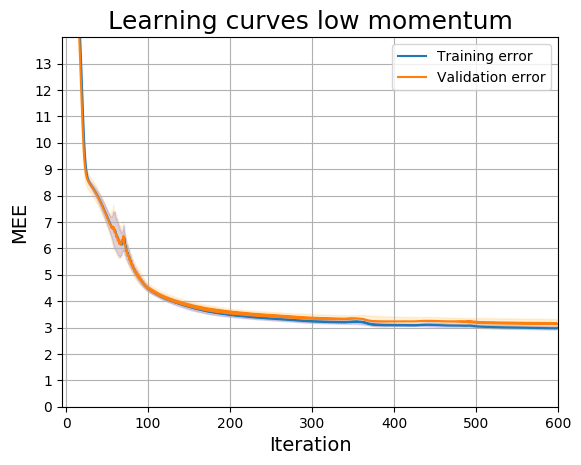

In [139]:
plt.style.use('default')

plt.plot(range(len(historyTr_LM_mean)),historyTr_LM_mean, label = 'Training error')
plt.fill_between(range(len(historyTr_LM_mean)), historyTr_LM_mean - historyTr_LM_sd, 
                 historyTr_LM_mean + historyTr_LM_sd, 
                 color='b', alpha=0.15)

plt.plot(range(len(historyVal_LM_mean)), historyVal_LM_mean, label = 'Validation error')
plt.fill_between(range(len(historyVal_LM_mean)), historyVal_LM_mean - historyVal_LM_sd, 
                 historyVal_LM_mean + historyVal_LM_sd, 
                 color='orange', alpha=0.15)

plt.ylabel('MEE', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning curves low momentum', fontsize = 18)
plt.legend()
plt.ylim(5,14)
plt.xlim(-5,600)
plt.yticks(np.arange(0, 14, +1))

plt.grid()

In [140]:
print("Low momentum (mom=0.01) result:")
print("MEE on the validation",historyVal_LM_mean[-1],"with standard deviation",historyVal_LM_sd[-1])
print("MEE on the training",historyTr_LM_mean[-1],"with standard deviation",historyTr_LM_sd[-1])

Low momentum (mom=0.01) result:
MEE on the validation 3.1332415103912354 with standard deviation 0.17323165611497843
MEE on the training 2.978635835647583 with standard deviation 0.06134002958185802


In [69]:
def create_model_ES():
    # create model
    model = Sequential()
    model.add(Dense(mlpr.best_params_['unit1'], input_dim=10, activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(mlpr.best_params_['unit2'], activation=mlpr.best_params_['act'], 
                    kernel_regularizer=l2(mlpr.best_params_['alpha']),
                    kernel_initializer=RandomUniform(minval=-0.7, maxval=0.7, seed=1)))
    model.add(Dense(2, activation='linear'))
    # Compile model
    model.compile(loss=[MEE_k], optimizer= SGD(lr=mlpr.best_params_['lr'], 
                                                            momentum=mlpr.best_params_['mom']))
    return model

In [88]:
historyVal_ES = []
historyTr_ES = []

el=EarlyStopping(monitor='val_loss', patience=50)


for traing_index, test_index in kf.split(X_dev):
    x_tr = X_dev[traing_index]
    y_tr = y_dev[traing_index]
    x_val = X_dev[test_index]
    y_val = y_dev[test_index]
    model=create_model_ES()
    #model.add_loss(MEE_k)
    history=model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=600, 
                      batch_size=1036, callbacks=[el]).history
    historyVal_ES.append(history['val_loss'])
    historyTr_ES.append(history['loss'])


Train on 1036 samples, validate on 259 samples
Epoch 1/600
1036/1036 [==============================] - 1s 1ms/step - loss: 58.1761 - val_loss: 53.9714
Epoch 2/600
1036/1036 [==============================] - 0s 8us/step - loss: 55.4619 - val_loss: 49.8553
Epoch 3/600
1036/1036 [==============================] - 0s 7us/step - loss: 51.3310 - val_loss: 44.3965
Epoch 4/600
1036/1036 [==============================] - 0s 7us/step - loss: 45.8511 - val_loss: 37.3088
Epoch 5/600
1036/1036 [==============================] - 0s 8us/step - loss: 38.7407 - val_loss: 29.1154
Epoch 6/600
1036/1036 [==============================] - 0s 13us/step - loss: 30.5020 - val_loss: 21.7680
Epoch 7/600
1036/1036 [==============================] - 0s 8us/step - loss: 23.0403 - val_loss: 18.1008
Epoch 8/600
1036/1036 [==============================] - 0s 11us/step - loss: 18.9437 - val_loss: 16.4724
Epoch 9/600
1036/1036 [==============================] - 0s 13us/step - loss: 16.9596 - val_loss: 15.8213
Epoch

Epoch 79/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.4317 - val_loss: 3.6765
Epoch 80/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.4184 - val_loss: 3.6343
Epoch 81/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.3831 - val_loss: 3.6437
Epoch 82/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.3716 - val_loss: 3.6076
Epoch 83/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.3418 - val_loss: 3.6198
Epoch 84/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.3326 - val_loss: 3.5844
Epoch 85/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.3034 - val_loss: 3.5941
Epoch 86/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.2921 - val_loss: 3.5605
Epoch 87/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.2627 - val_loss: 3.5659
Epoch 88/600
1036/1036 [==============================] - 

Epoch 157/600
1036/1036 [==============================] - 0s 15us/step - loss: 2.8070 - val_loss: 3.2731
Epoch 158/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.8066 - val_loss: 3.2568
Epoch 159/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.8020 - val_loss: 3.2691
Epoch 160/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.8019 - val_loss: 3.2528
Epoch 161/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.7971 - val_loss: 3.2649
Epoch 162/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7970 - val_loss: 3.2489
Epoch 163/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7923 - val_loss: 3.2606
Epoch 164/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7920 - val_loss: 3.2449
Epoch 165/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7874 - val_loss: 3.2559
Epoch 166/600
1036/1036 [========================

Epoch 235/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6194 - val_loss: 3.0914
Epoch 236/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.6146 - val_loss: 3.1296
Epoch 237/600
1036/1036 [==============================] - 0s 14us/step - loss: 2.6164 - val_loss: 3.0883
Epoch 238/600
1036/1036 [==============================] - 0s 14us/step - loss: 2.6113 - val_loss: 3.1277
Epoch 239/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6132 - val_loss: 3.0848
Epoch 240/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.6073 - val_loss: 3.1233
Epoch 241/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6078 - val_loss: 3.0806
Epoch 242/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6023 - val_loss: 3.1205
Epoch 243/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6038 - val_loss: 3.0776
Epoch 244/600
1036/1036 [======================

Epoch 313/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.5471 - val_loss: 3.0501
Epoch 314/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5432 - val_loss: 3.0900
Epoch 315/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.5451 - val_loss: 3.0464
Epoch 316/600
1036/1036 [==============================] - 0s 14us/step - loss: 2.5396 - val_loss: 3.0896
Epoch 317/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.5411 - val_loss: 3.0421
Epoch 318/600
1036/1036 [==============================] - 0s 14us/step - loss: 2.5355 - val_loss: 3.0888
Epoch 319/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.5375 - val_loss: 3.0389
Epoch 320/600
1036/1036 [==============================] - 0s 16us/step - loss: 2.5329 - val_loss: 3.0880
Epoch 321/600
1036/1036 [==============================] - 0s 15us/step - loss: 2.5342 - val_loss: 3.0359
Epoch 322/600
1036/1036 [=====================

Epoch 391/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.5058 - val_loss: 3.0559
Epoch 392/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.5052 - val_loss: 3.0594
Epoch 393/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5040 - val_loss: 3.0556
Epoch 394/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5036 - val_loss: 3.0591
Epoch 395/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5026 - val_loss: 3.0559
Epoch 396/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.5026 - val_loss: 3.0590
Epoch 397/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5019 - val_loss: 3.0567
Epoch 398/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5022 - val_loss: 3.0593
Epoch 399/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5017 - val_loss: 3.0579
Epoch 400/600
1036/1036 [=======================

Epoch 66/600
1036/1036 [==============================] - 0s 13us/step - loss: 4.0906 - val_loss: 4.1726
Epoch 67/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.9073 - val_loss: 3.9789
Epoch 68/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.8212 - val_loss: 4.0483
Epoch 69/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.7924 - val_loss: 3.9410
Epoch 70/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.7804 - val_loss: 4.0548
Epoch 71/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.7995 - val_loss: 3.9362
Epoch 72/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.7887 - val_loss: 4.0411
Epoch 73/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.7915 - val_loss: 3.8947
Epoch 74/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.7549 - val_loss: 3.9638
Epoch 75/600
1036/1036 [==============================] 

Epoch 144/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9700 - val_loss: 3.1296
Epoch 145/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9738 - val_loss: 3.1007
Epoch 146/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9609 - val_loss: 3.1179
Epoch 147/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9629 - val_loss: 3.0907
Epoch 148/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9494 - val_loss: 3.1052
Epoch 149/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9504 - val_loss: 3.0757
Epoch 150/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9327 - val_loss: 3.0887
Epoch 151/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9344 - val_loss: 3.0648
Epoch 152/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.9204 - val_loss: 3.0764
Epoch 153/600
1036/1036 [=====================

Epoch 222/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7948 - val_loss: 2.9661
Epoch 223/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.7921 - val_loss: 2.9810
Epoch 224/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7926 - val_loss: 2.9640
Epoch 225/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.7895 - val_loss: 2.9786
Epoch 226/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7892 - val_loss: 2.9612
Epoch 227/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7861 - val_loss: 2.9757
Epoch 228/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.7855 - val_loss: 2.9585
Epoch 229/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7826 - val_loss: 2.9728
Epoch 230/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.7819 - val_loss: 2.9561
Epoch 231/600
1036/1036 [========================

Epoch 300/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6949 - val_loss: 2.9135
Epoch 301/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6996 - val_loss: 2.9141
Epoch 302/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6927 - val_loss: 2.9127
Epoch 303/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6976 - val_loss: 2.9130
Epoch 304/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6905 - val_loss: 2.9120
Epoch 305/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6955 - val_loss: 2.9119
Epoch 306/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6883 - val_loss: 2.9113
Epoch 307/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6935 - val_loss: 2.9109
Epoch 308/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6861 - val_loss: 2.9106
Epoch 309/600
1036/1036 [=======================

Epoch 378/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5821 - val_loss: 2.8681
Epoch 379/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5753 - val_loss: 2.8418
Epoch 380/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5757 - val_loss: 2.8663
Epoch 381/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5685 - val_loss: 2.8369
Epoch 382/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5711 - val_loss: 2.8660
Epoch 383/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5637 - val_loss: 2.8343
Epoch 384/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.5687 - val_loss: 2.8670
Epoch 385/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5618 - val_loss: 2.8349
Epoch 386/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5681 - val_loss: 2.8681
Epoch 387/600
1036/1036 [============================

1036/1036 [==============================] - 0s 11us/step - loss: 8.6420 - val_loss: 8.8762
Epoch 23/600
1036/1036 [==============================] - 0s 12us/step - loss: 8.4779 - val_loss: 8.7098
Epoch 24/600
1036/1036 [==============================] - 0s 11us/step - loss: 8.3349 - val_loss: 8.5214
Epoch 25/600
1036/1036 [==============================] - 0s 11us/step - loss: 8.1805 - val_loss: 8.3514
Epoch 26/600
1036/1036 [==============================] - 0s 10us/step - loss: 8.0317 - val_loss: 8.1979
Epoch 27/600
1036/1036 [==============================] - 0s 11us/step - loss: 7.8842 - val_loss: 8.0482
Epoch 28/600
1036/1036 [==============================] - 0s 9us/step - loss: 7.7424 - val_loss: 7.8893
Epoch 29/600
1036/1036 [==============================] - 0s 8us/step - loss: 7.5993 - val_loss: 7.7271
Epoch 30/600
1036/1036 [==============================] - 0s 7us/step - loss: 7.4543 - val_loss: 7.5648
Epoch 31/600
1036/1036 [==============================] - 0s 6us/step -

Epoch 101/600
1036/1036 [==============================] - 0s 17us/step - loss: 3.1400 - val_loss: 2.9847
Epoch 102/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.1251 - val_loss: 3.0290
Epoch 103/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.1231 - val_loss: 2.9762
Epoch 104/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.1096 - val_loss: 3.0217
Epoch 105/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.1083 - val_loss: 2.9699
Epoch 106/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.0976 - val_loss: 3.0161
Epoch 107/600
1036/1036 [==============================] - 0s 13us/step - loss: 3.0958 - val_loss: 2.9649
Epoch 108/600
1036/1036 [==============================] - 0s 15us/step - loss: 3.0868 - val_loss: 3.0118
Epoch 109/600
1036/1036 [==============================] - 0s 12us/step - loss: 3.0842 - val_loss: 2.9599
Epoch 110/600
1036/1036 [=====================

Epoch 179/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.8447 - val_loss: 2.9012
Epoch 180/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.8445 - val_loss: 2.9471
Epoch 181/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.8502 - val_loss: 2.9084
Epoch 182/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8512 - val_loss: 2.9522
Epoch 183/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8542 - val_loss: 2.9072
Epoch 184/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.8477 - val_loss: 2.9452
Epoch 185/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8454 - val_loss: 2.9011
Epoch 186/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.8385 - val_loss: 2.9404
Epoch 187/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.8390 - val_loss: 2.8988
Epoch 188/600
1036/1036 [========================

Epoch 257/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7382 - val_loss: 2.8518
Epoch 258/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7438 - val_loss: 2.8872
Epoch 259/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7396 - val_loss: 2.8535
Epoch 260/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7451 - val_loss: 2.8876
Epoch 261/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7375 - val_loss: 2.8481
Epoch 262/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7382 - val_loss: 2.8800
Epoch 263/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7285 - val_loss: 2.8372
Epoch 264/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7246 - val_loss: 2.8689
Epoch 265/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7165 - val_loss: 2.8258
Epoch 266/600
1036/1036 [===========================

Epoch 335/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6168 - val_loss: 2.7686
Epoch 336/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6179 - val_loss: 2.8124
Epoch 337/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6226 - val_loss: 2.7788
Epoch 338/600
1036/1036 [==============================] - 0s 13us/step - loss: 2.6300 - val_loss: 2.8280
Epoch 339/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6401 - val_loss: 2.8055
Epoch 340/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6626 - val_loss: 2.8520
Epoch 341/600
1036/1036 [==============================] - 0s 19us/step - loss: 2.6698 - val_loss: 2.8161
Epoch 342/600
1036/1036 [==============================] - 0s 17us/step - loss: 2.6739 - val_loss: 2.8461
Epoch 343/600
1036/1036 [==============================] - 0s 15us/step - loss: 2.6622 - val_loss: 2.8052
Epoch 344/600
1036/1036 [======================

Epoch 413/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.5967 - val_loss: 2.7808
Epoch 414/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6049 - val_loss: 2.8218
Epoch 415/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6133 - val_loss: 2.7963
Epoch 416/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6267 - val_loss: 2.8349
Epoch 417/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6262 - val_loss: 2.7990
Epoch 418/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6307 - val_loss: 2.8323
Epoch 419/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6215 - val_loss: 2.7928
Epoch 420/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6217 - val_loss: 2.8258
Epoch 421/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6123 - val_loss: 2.7835
Epoch 422/600
1036/1036 [=============================

Epoch 62/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.5171 - val_loss: 3.3875
Epoch 63/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.4881 - val_loss: 3.3696
Epoch 64/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.4605 - val_loss: 3.3450
Epoch 65/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.4342 - val_loss: 3.3328
Epoch 66/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.4106 - val_loss: 3.3094
Epoch 67/600
1036/1036 [==============================] - 0s 11us/step - loss: 3.3930 - val_loss: 3.3354
Epoch 68/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.3943 - val_loss: 3.3739
Epoch 69/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.4365 - val_loss: 3.4734
Epoch 70/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.5201 - val_loss: 3.6054
Epoch 71/600
1036/1036 [==============================] - 0s 9u

Epoch 141/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9729 - val_loss: 3.0348
Epoch 142/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9642 - val_loss: 3.0001
Epoch 143/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9732 - val_loss: 3.0309
Epoch 144/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.9595 - val_loss: 2.9911
Epoch 145/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.9630 - val_loss: 3.0183
Epoch 146/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9460 - val_loss: 2.9757
Epoch 147/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9467 - val_loss: 3.0046
Epoch 148/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9309 - val_loss: 2.9624
Epoch 149/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9336 - val_loss: 2.9963
Epoch 150/600
1036/1036 [===========================

Epoch 219/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7865 - val_loss: 2.8731
Epoch 220/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7786 - val_loss: 2.8074
Epoch 221/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7852 - val_loss: 2.8722
Epoch 222/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7777 - val_loss: 2.8063
Epoch 223/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7837 - val_loss: 2.8702
Epoch 224/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7757 - val_loss: 2.8043
Epoch 225/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7809 - val_loss: 2.8669
Epoch 226/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7725 - val_loss: 2.8014
Epoch 227/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7772 - val_loss: 2.8635
Epoch 228/600
1036/1036 [========================

Epoch 297/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6887 - val_loss: 2.7859
Epoch 298/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6805 - val_loss: 2.7255
Epoch 299/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6865 - val_loss: 2.7843
Epoch 300/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6784 - val_loss: 2.7241
Epoch 301/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6846 - val_loss: 2.7829
Epoch 302/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6765 - val_loss: 2.7231
Epoch 303/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6830 - val_loss: 2.7817
Epoch 304/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6748 - val_loss: 2.7224
Epoch 305/600
1036/1036 [==============================] - 0s 6us/step - loss: 2.6816 - val_loss: 2.7806
Epoch 306/600
1036/1036 [===========================

Epoch 375/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6255 - val_loss: 2.7436
Epoch 376/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6211 - val_loss: 2.7024
Epoch 377/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6320 - val_loss: 2.7431
Epoch 378/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6192 - val_loss: 2.6937
Epoch 379/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6224 - val_loss: 2.7371
Epoch 380/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6124 - val_loss: 2.6903
Epoch 381/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6183 - val_loss: 2.7357
Epoch 382/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.6087 - val_loss: 2.6859
Epoch 383/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6136 - val_loss: 2.7320
Epoch 384/600
1036/1036 [=======================

Epoch 453/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5590 - val_loss: 2.7030
Epoch 454/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5536 - val_loss: 2.6724
Epoch 455/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5604 - val_loss: 2.7070
Epoch 456/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5570 - val_loss: 2.6765
Epoch 457/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5647 - val_loss: 2.7118
Epoch 458/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5610 - val_loss: 2.6795
Epoch 459/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.5681 - val_loss: 2.7173
Epoch 460/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.5661 - val_loss: 2.6848
Epoch 461/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.5739 - val_loss: 2.7210
Epoch 462/600
1036/1036 [===========================

Epoch 55/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.7795 - val_loss: 3.9427
Epoch 56/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.7321 - val_loss: 3.8975
Epoch 57/600
1036/1036 [==============================] - 0s 10us/step - loss: 3.6874 - val_loss: 3.8558
Epoch 58/600
1036/1036 [==============================] - 0s 9us/step - loss: 3.6457 - val_loss: 3.8167
Epoch 59/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.6066 - val_loss: 3.7789
Epoch 60/600
1036/1036 [==============================] - 0s 7us/step - loss: 3.5698 - val_loss: 3.7413
Epoch 61/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.5352 - val_loss: 3.7053
Epoch 62/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.5027 - val_loss: 3.6710
Epoch 63/600
1036/1036 [==============================] - 0s 8us/step - loss: 3.4722 - val_loss: 3.6379
Epoch 64/600
1036/1036 [==============================] - 0s 8

Epoch 134/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8696 - val_loss: 2.9513
Epoch 135/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.8826 - val_loss: 2.9339
Epoch 136/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9083 - val_loss: 2.9965
Epoch 137/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9202 - val_loss: 2.9533
Epoch 138/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.9295 - val_loss: 2.9962
Epoch 139/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.9183 - val_loss: 2.9351
Epoch 140/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.9123 - val_loss: 2.9660
Epoch 141/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8911 - val_loss: 2.9033
Epoch 142/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.8811 - val_loss: 2.9406
Epoch 143/600
1036/1036 [==============================

Epoch 212/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7130 - val_loss: 2.7980
Epoch 213/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7130 - val_loss: 2.7790
Epoch 214/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7086 - val_loss: 2.7907
Epoch 215/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7070 - val_loss: 2.7782
Epoch 216/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7039 - val_loss: 2.7841
Epoch 217/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.7028 - val_loss: 2.7776
Epoch 218/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6990 - val_loss: 2.7757
Epoch 219/600
1036/1036 [==============================] - 0s 11us/step - loss: 2.6976 - val_loss: 2.7775
Epoch 220/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6949 - val_loss: 2.7697
Epoch 221/600
1036/1036 [==========================

Epoch 290/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6393 - val_loss: 2.7669
Epoch 291/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6405 - val_loss: 2.7385
Epoch 292/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6436 - val_loss: 2.7738
Epoch 293/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6442 - val_loss: 2.7407
Epoch 294/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6489 - val_loss: 2.7815
Epoch 295/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6489 - val_loss: 2.7424
Epoch 296/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6541 - val_loss: 2.7876
Epoch 297/600
1036/1036 [==============================] - 0s 7us/step - loss: 2.6522 - val_loss: 2.7441
Epoch 298/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6602 - val_loss: 2.7950
Epoch 299/600
1036/1036 [=============================

Epoch 368/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5937 - val_loss: 2.7688
Epoch 369/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.5977 - val_loss: 2.7399
Epoch 370/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.6295 - val_loss: 2.8195
Epoch 371/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.6446 - val_loss: 2.7823
Epoch 372/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.6872 - val_loss: 2.8782
Epoch 373/600
1036/1036 [==============================] - 0s 12us/step - loss: 2.6992 - val_loss: 2.8126
Epoch 374/600
1036/1036 [==============================] - 0s 9us/step - loss: 2.7307 - val_loss: 2.8962
Epoch 375/600
1036/1036 [==============================] - 0s 8us/step - loss: 2.7148 - val_loss: 2.7865
Epoch 376/600
1036/1036 [==============================] - 0s 10us/step - loss: 2.7063 - val_loss: 2.8549
Epoch 377/600
1036/1036 [===========================

In [110]:
min_k=600
for i in range(0,5):
    if len(historyVal_ES[i])<min_k:
        min_k=len(historyVal_ES[i])
for i in range(0,5):
    del historyVal_ES[i][min_k:]
    del historyTr_ES[i][min_k:]

In [123]:
mc_ES = ModelCheckpoint('Early_stopping_BEST.h5', monitor='val_loss', save_best_only=True)

model=create_model_ES()
#model.add_loss(MEE_k)
model.fit(X_dev, y_dev, epochs=min_k, 
                      batch_size=1036, callbacks=[mc_ES]).history

model.save("Models/Early_stopping_BEST")

Epoch 1/403
1295/1295 [==============================] - 1s 1ms/step - loss: 57.1528
Epoch 2/403
1295/1295 [==============================] - 0s 9us/step - loss: 49.9122
Epoch 3/403
1295/1295 [==============================] - 0s 22us/step - loss: 37.1860
Epoch 4/403
1295/1295 [==============================] - 0s 11us/step - loss: 22.5878
Epoch 5/403
1295/1295 [==============================] - 0s 18us/step - loss: 16.9672
Epoch 6/403
1295/1295 [==============================] - 0s 11us/step - loss: 15.3731
Epoch 7/403
1295/1295 [==============================] - 0s 20us/step - loss: 13.7093
Epoch 8/403
1295/1295 [==============================] - 0s 21us/step - loss: 11.5272
Epoch 9/403
1295/1295 [==============================] - 0s 19us/step - loss: 9.7506
Epoch 10/403
1295/1295 [==============================] - 0s 19us/step - loss: 9.0008
Epoch 11/403
1295/1295 [==============================] - 0s 16us/step - loss: 8.6299
Epoch 12/403
1295/1295 [==============================] -

1295/1295 [==============================] - 0s 17us/step - loss: 2.9187
Epoch 97/403
1295/1295 [==============================] - 0s 13us/step - loss: 2.8727
Epoch 98/403
1295/1295 [==============================] - 0s 21us/step - loss: 2.8964
Epoch 99/403
1295/1295 [==============================] - 0s 16us/step - loss: 2.8015
Epoch 100/403
1295/1295 [==============================] - 0s 16us/step - loss: 2.9052
Epoch 101/403
1295/1295 [==============================] - 0s 20us/step - loss: 3.1533
Epoch 102/403
1295/1295 [==============================] - 0s 10us/step - loss: 2.8282
Epoch 103/403
1295/1295 [==============================] - 0s 20us/step - loss: 2.9723
Epoch 104/403
1295/1295 [==============================] - 0s 15us/step - loss: 3.2924
Epoch 105/403
1295/1295 [==============================] - 0s 14us/step - loss: 2.8611
Epoch 106/403
1295/1295 [==============================] - 0s 23us/step - loss: 3.1214
Epoch 107/403
1295/1295 [==============================] - 0

1295/1295 [==============================] - 0s 13us/step - loss: 2.5001
Epoch 285/403
1295/1295 [==============================] - 0s 10us/step - loss: 2.5724
Epoch 286/403
1295/1295 [==============================] - 0s 14us/step - loss: 2.5308
Epoch 287/403
1295/1295 [==============================] - 0s 15us/step - loss: 2.4946
Epoch 288/403
1295/1295 [==============================] - 0s 16us/step - loss: 2.4975
Epoch 289/403
1295/1295 [==============================] - 0s 19us/step - loss: 2.5384
Epoch 290/403
1295/1295 [==============================] - 0s 46us/step - loss: 2.6307
Epoch 291/403
1295/1295 [==============================] - 0s 11us/step - loss: 2.6714
Epoch 292/403
1295/1295 [==============================] - 0s 14us/step - loss: 2.5664
Epoch 293/403
1295/1295 [==============================] - 0s 16us/step - loss: 2.5693
Epoch 294/403
1295/1295 [==============================] - 0s 16us/step - loss: 2.6955
Epoch 295/403
1295/1295 [==============================] 

1295/1295 [==============================] - 0s 14us/step - loss: 2.6469
Epoch 379/403
1295/1295 [==============================] - 0s 16us/step - loss: 2.6713
Epoch 380/403
1295/1295 [==============================] - 0s 13us/step - loss: 2.6386
Epoch 381/403
1295/1295 [==============================] - 0s 14us/step - loss: 2.4455
Epoch 382/403
1295/1295 [==============================] - 0s 12us/step - loss: 2.4526
Epoch 383/403
1295/1295 [==============================] - 0s 15us/step - loss: 2.4479
Epoch 384/403
1295/1295 [==============================] - 0s 15us/step - loss: 2.4781
Epoch 385/403
1295/1295 [==============================] - 0s 15us/step - loss: 2.3857
Epoch 386/403
1295/1295 [==============================] - 0s 21us/step - loss: 2.4334
Epoch 387/403
1295/1295 [==============================] - 0s 34us/step - loss: 2.6638
Epoch 388/403
1295/1295 [==============================] - 0s 21us/step - loss: 2.5599
Epoch 389/403
1295/1295 [==============================] 

{'loss': [57.15279006958008,
  49.91223373413086,
  37.18602981567383,
  22.587818908691407,
  16.967239379882812,
  15.37314567565918,
  13.70934829711914,
  11.527245140075683,
  9.750591468811034,
  9.000824737548829,
  8.629863166809082,
  8.40115737915039,
  8.13329200744629,
  7.877731132507324,
  7.616835021972657,
  7.357122993469238,
  7.077778911590576,
  6.761023426055909,
  6.45189905166626,
  6.256530094146728,
  5.902564239501953,
  5.59234037399292,
  5.296206474304199,
  5.087981796264648,
  4.765192604064941,
  4.49569091796875,
  4.2762017250061035,
  4.123544597625733,
  4.0050146102905275,
  4.186907386779785,
  3.835459756851196,
  3.9054887771606444,
  3.958791732788086,
  3.67708044052124,
  3.545460891723633,
  3.9327532768249513,
  3.6124481678009035,
  3.5802958011627197,
  3.579975128173828,
  3.5831503868103027,
  3.3980677127838135,
  3.31854510307312,
  3.293759489059448,
  3.2676854610443113,
  3.49540057182312,
  3.717167615890503,
  3.248642587661743,
 

In [124]:
historyVal_ES_mean=np.mean(historyVal_ES, axis=0)
historyTr_ES_mean=np.mean(historyTr_ES, axis=0)

historyVal_ES_sd=np.std(historyVal_ES, axis=0)
historyTr_ES_sd=np.std(historyTr_ES, axis=0)

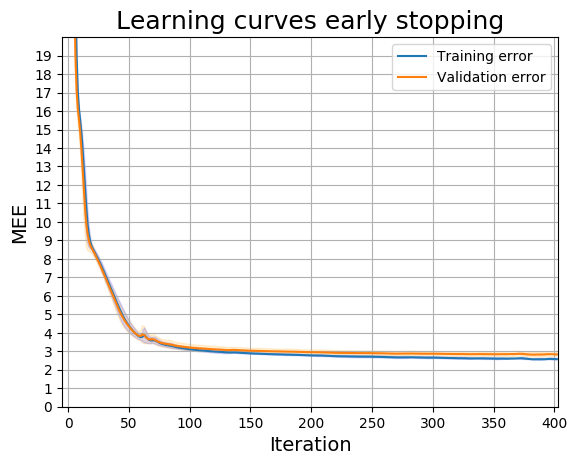

In [125]:
plt.style.use('default')

plt.plot(range(len(historyTr_ES_mean)),historyTr_ES_mean, label = 'Training error')
plt.fill_between(range(len(historyTr_ES_mean)), historyTr_ES_mean - historyTr_ES_sd, 
                 historyTr_ES_mean + historyTr_ES_sd, 
                 color='b', alpha=0.15)

plt.plot(range(len(historyVal_ES_mean)), historyVal_ES_mean, label = 'Validation error')
plt.fill_between(range(len(historyVal_ES_mean)), historyVal_ES_mean - historyVal_ES_sd, 
                 historyVal_ES_mean + historyVal_ES_sd, 
                 color='orange', alpha=0.15)

plt.ylabel('MEE', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning curves early stopping', fontsize = 18)
plt.legend()
plt.ylim(5,20)
plt.xlim(-5,min_k)
plt.yticks(np.arange(0, 20, +1))

plt.grid()

In [134]:
print("Best model with Early Stopping result:")
print("MEE on the validation",historyVal_ES_mean[-1],"with standard deviation",historyVal_ES_sd[-1])
print("MEE on the training",historyTr_ES_mean[-1],"with standard deviation",historyTr_ES_sd[-1])

Best model with Early Stopping result:
MEE on the validation 2.8313031673431395 with standard deviation 0.13222235544506072
MEE on the training 2.5731084823608397 with standard deviation 0.04089528889913201
